In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
df_FD = pd.read_pickle('cleaned_MASTER_dataset.pickle')  # fish details
df_LF = pd.read_pickle('cleaned_LENGTHFREQ_dataset.pickle')  # length frequencies
df_SD = pd.read_pickle('cleaned_LOGBOOK_dataset.pickle')  # logbook / sample data

# Histograms

--------------------------------------------------
Histogram: YY


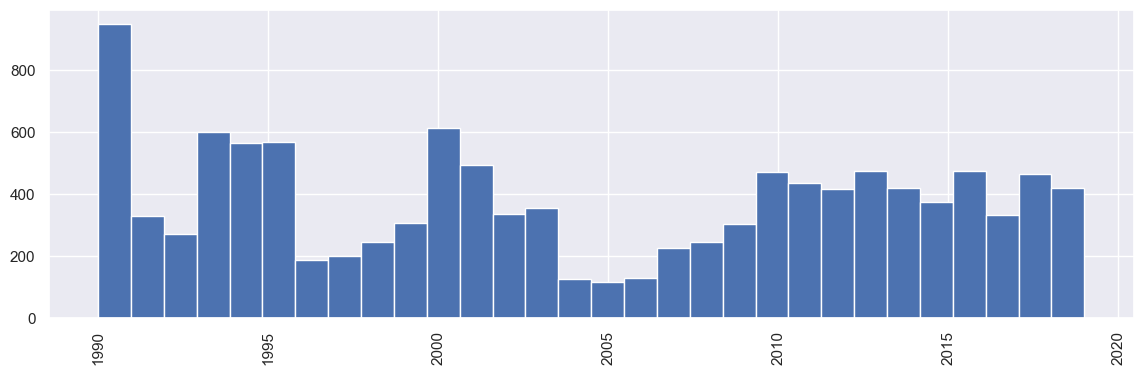

--------------------------------------------------
Histogram: MM


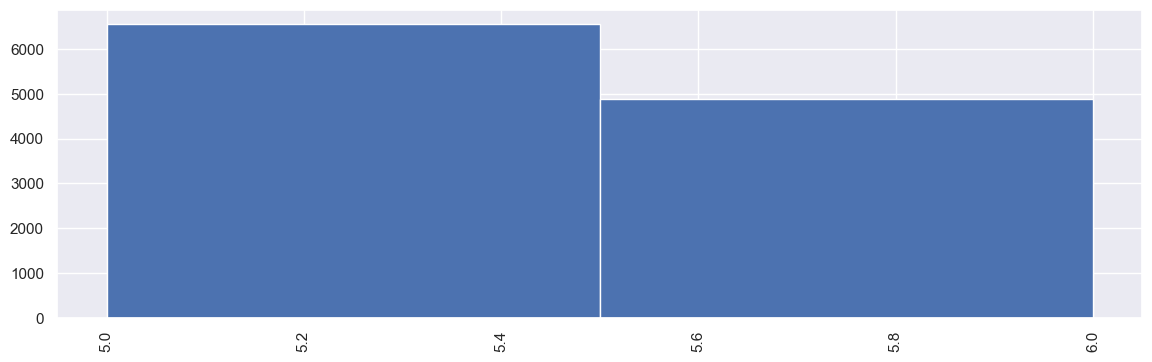

--------------------------------------------------
Histogram: DD


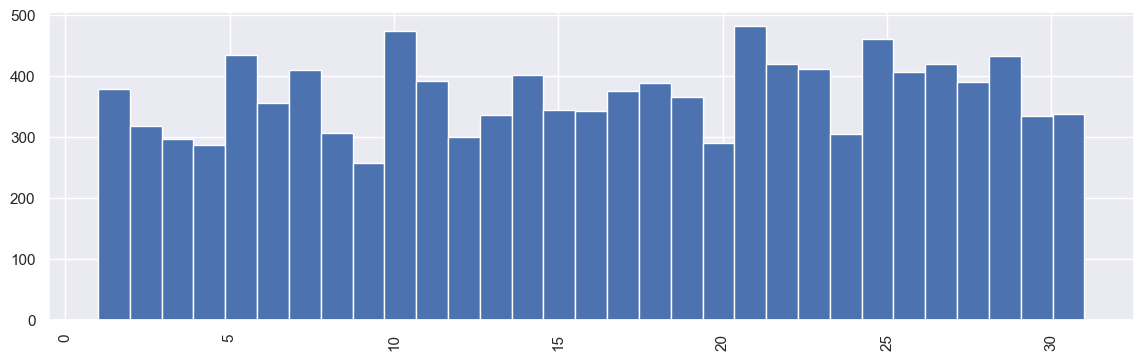

--------------------------------------------------
Histogram: TIME


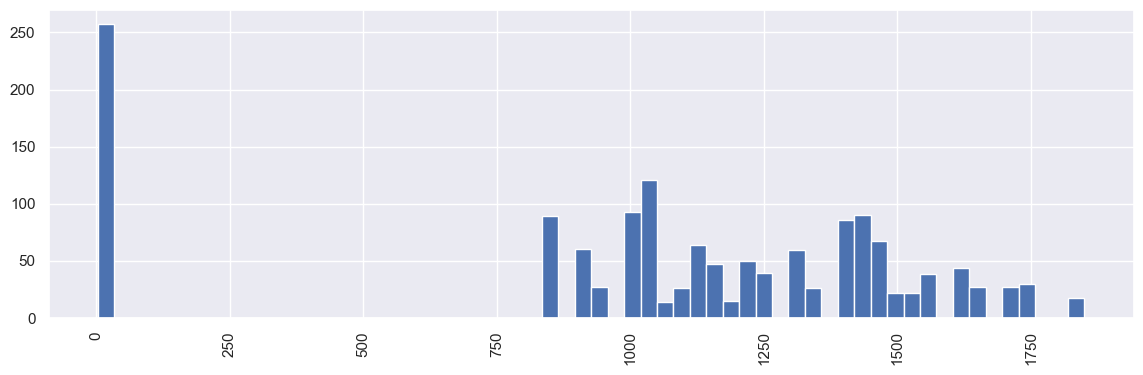

--------------------------------------------------
Histogram: RIVER


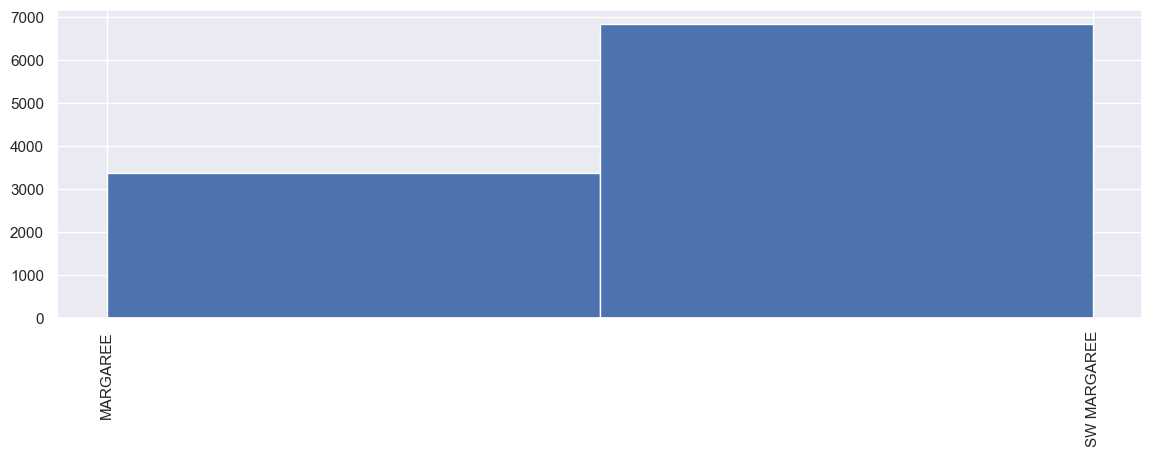

--------------------------------------------------
Histogram: WEEK


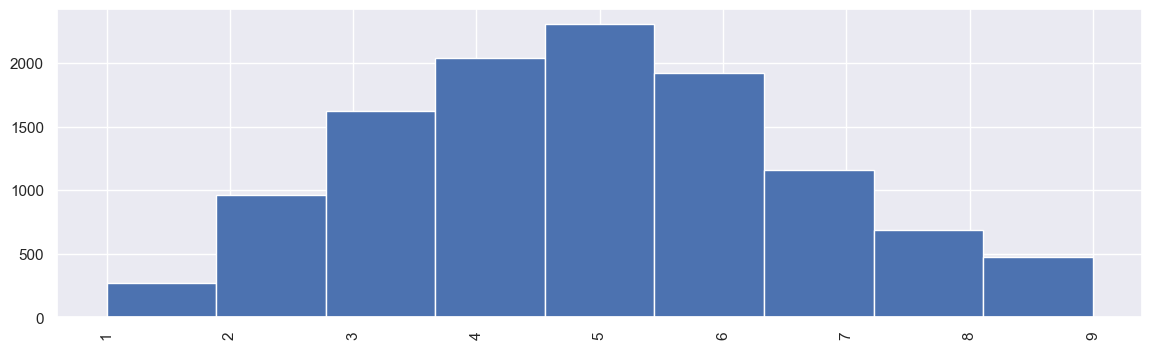

--------------------------------------------------
Histogram: LOC


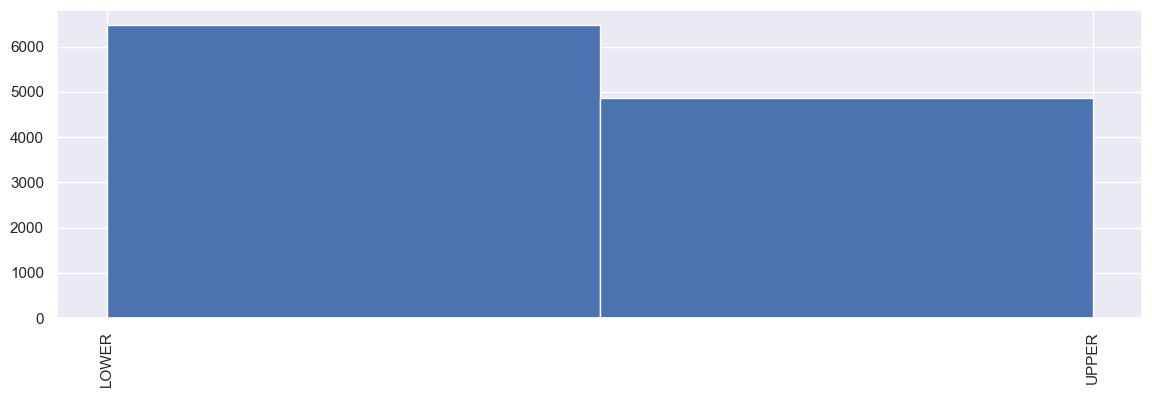

--------------------------------------------------
Histogram: PERIOD


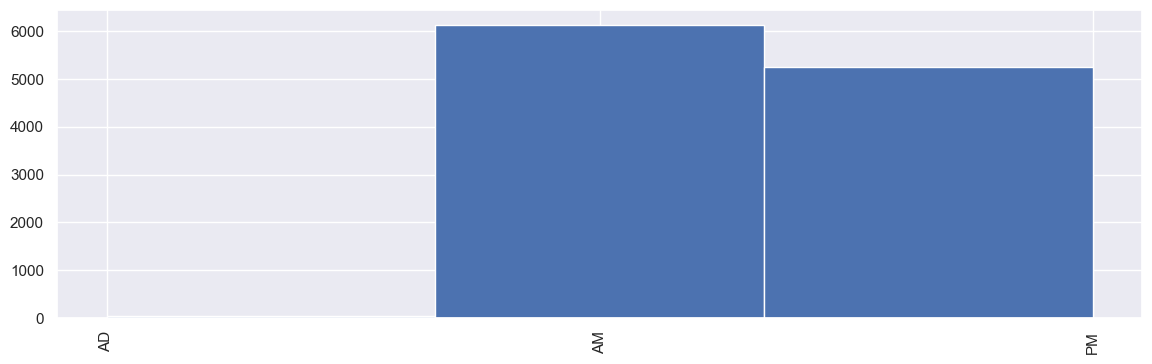

--------------------------------------------------
Histogram: WT_LBS


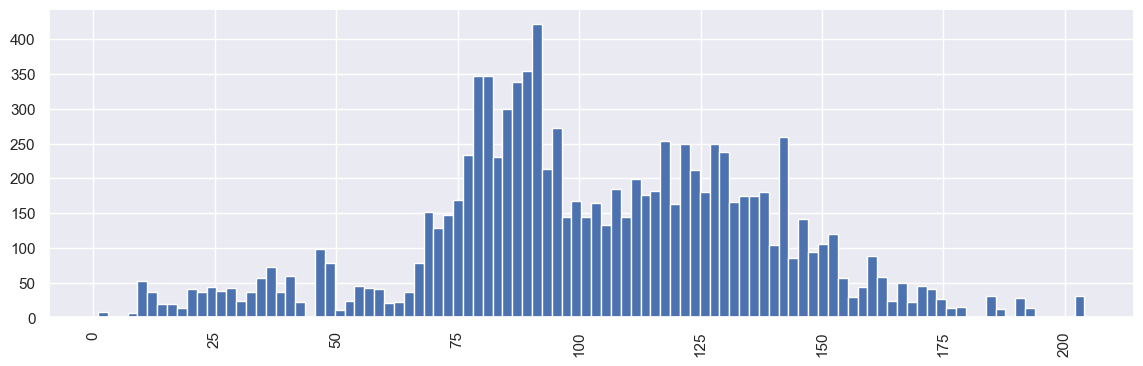

--------------------------------------------------
Histogram: WT_KG


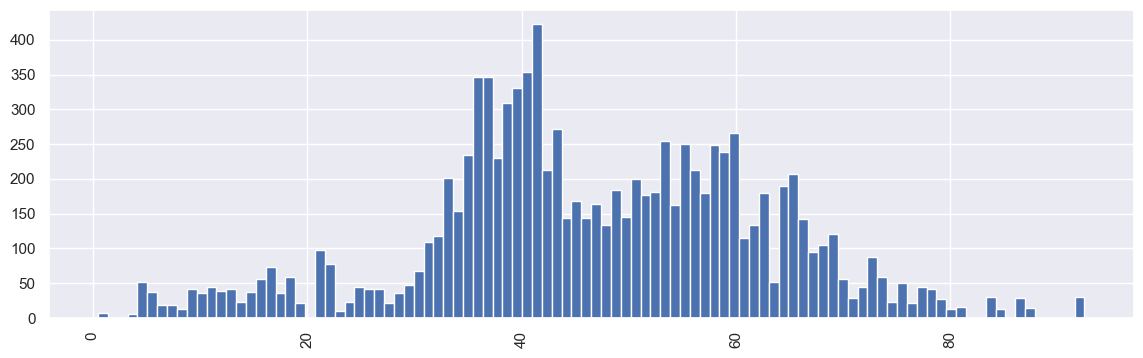

--------------------------------------------------
Histogram: LGTH


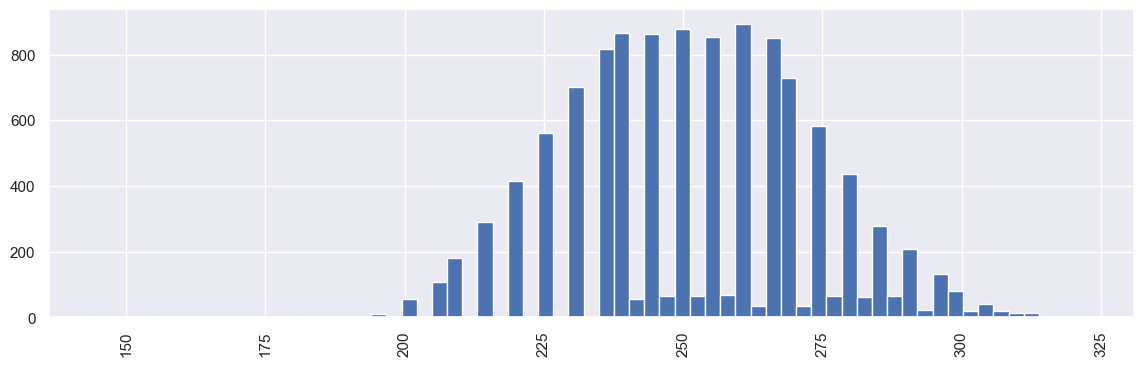

--------------------------------------------------
Histogram: FREQ


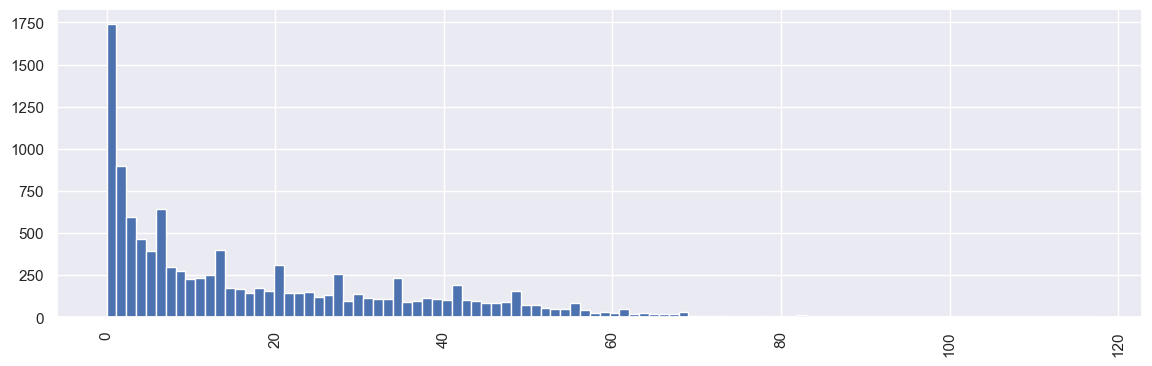

--------------------------------------------------
Histogram: FLBIN


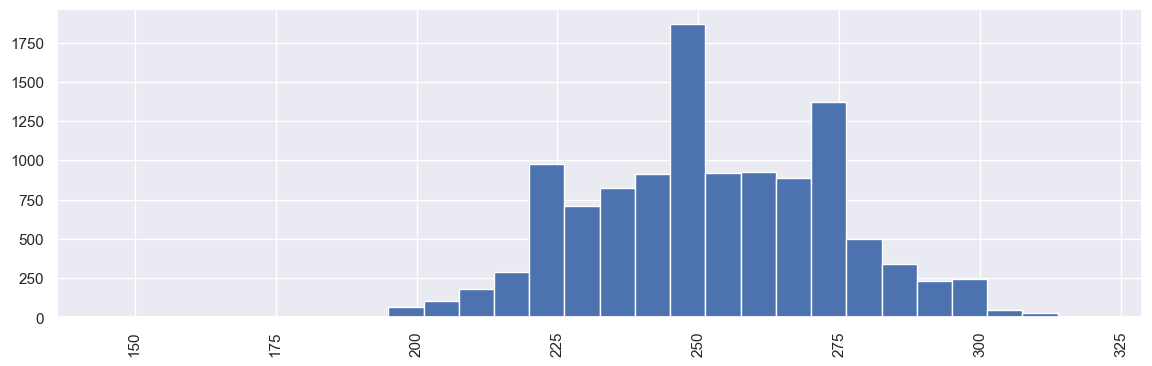

--------------------------------------------------
Histogram: SITE1


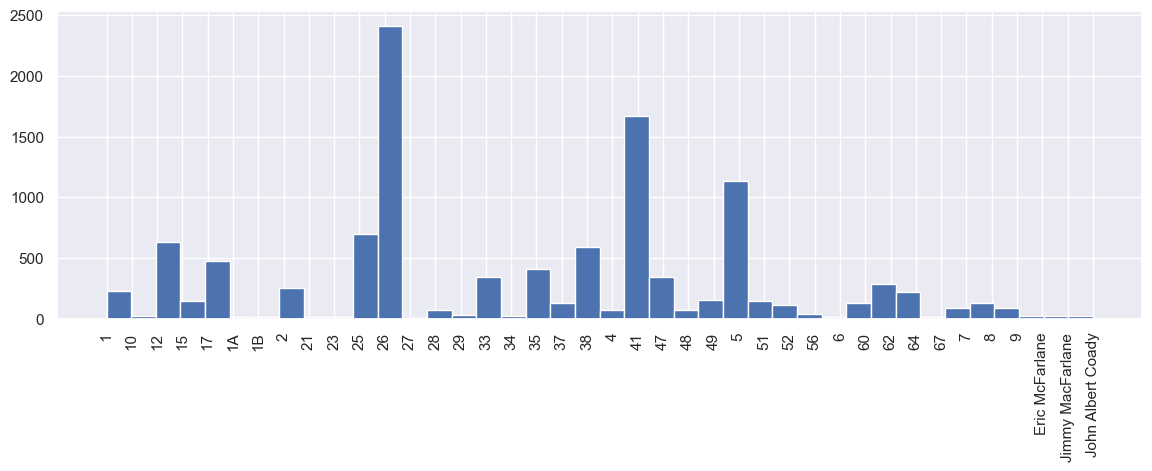

--------------------------------------------------
Histogram: SITE2


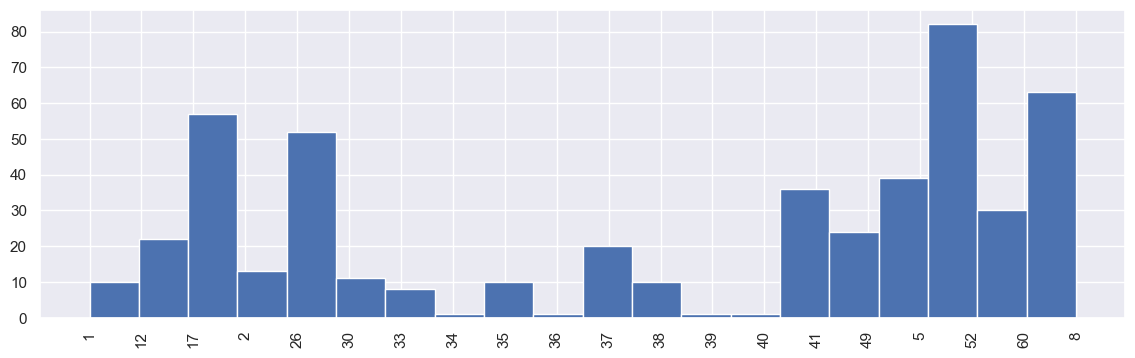

--------------------------------------------------
Histogram: SITE3


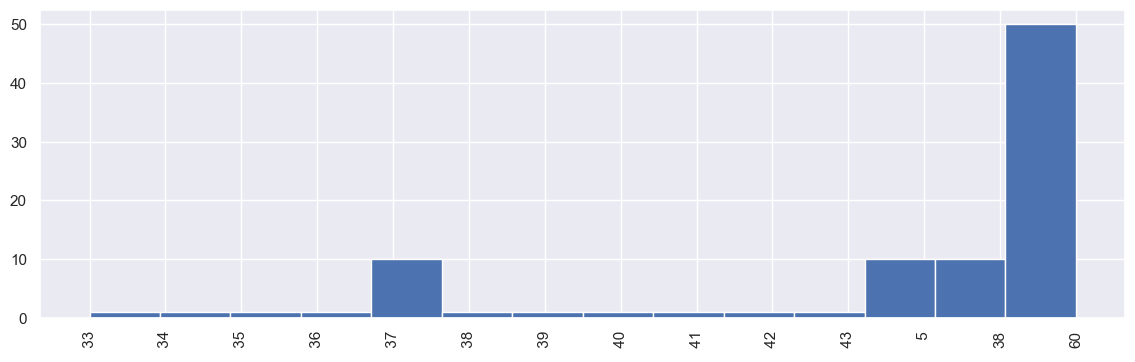

In [3]:
columns_to_print = ['yy', 'mm', 'dd', 'Time', 'river', 'week', 'loc', 'period',
       'wt_lbs', 'wt_kg', 'lgth', 'freq', 'Flbin', 'SITE1', 'SITE2', 'SITE3']

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = df_LF[column].nunique()
    
    max_bins = 100
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins

    # need to sort columns or categorical values are all over the place (still not perfect, but way better)
    df_LF.sort_values(column)[column].hist(bins=bins, color=sns.color_palette()[0], xrot=90)
    
    plt.show()

--------------------------------------------------
Histogram: SITE_NO


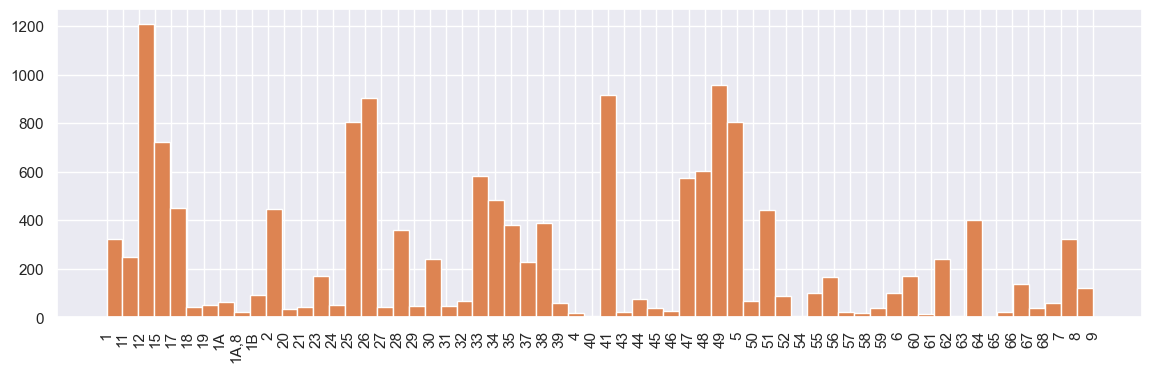

--------------------------------------------------
Histogram: NO_NETS


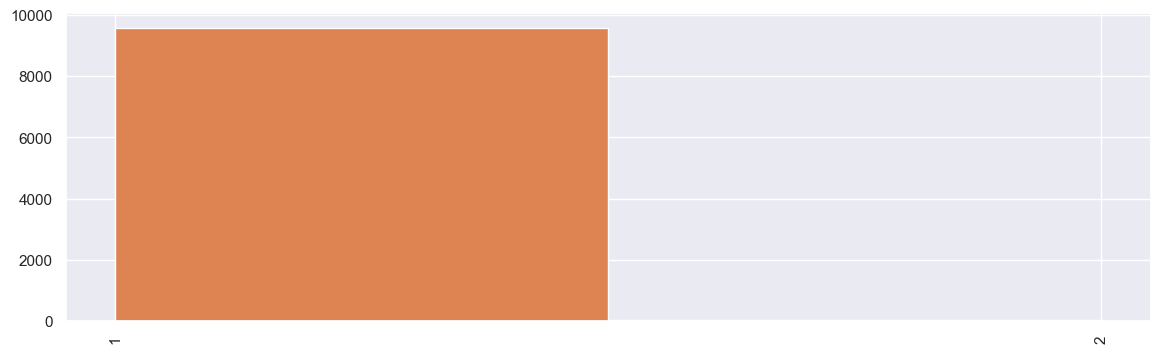

--------------------------------------------------
Histogram: YEAR


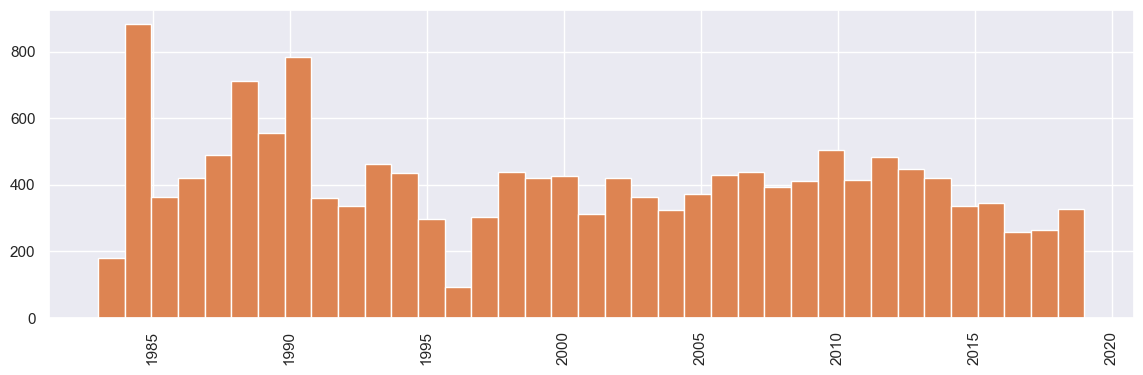

--------------------------------------------------
Histogram: MM


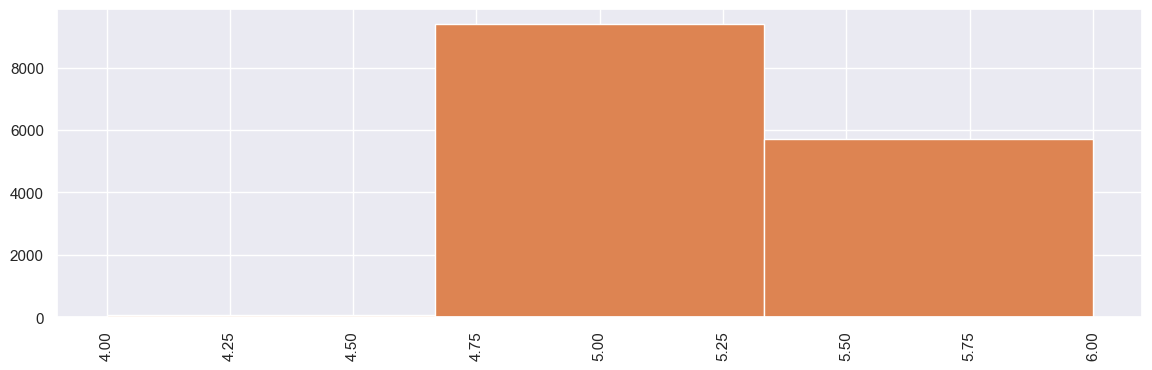

--------------------------------------------------
Histogram: DD


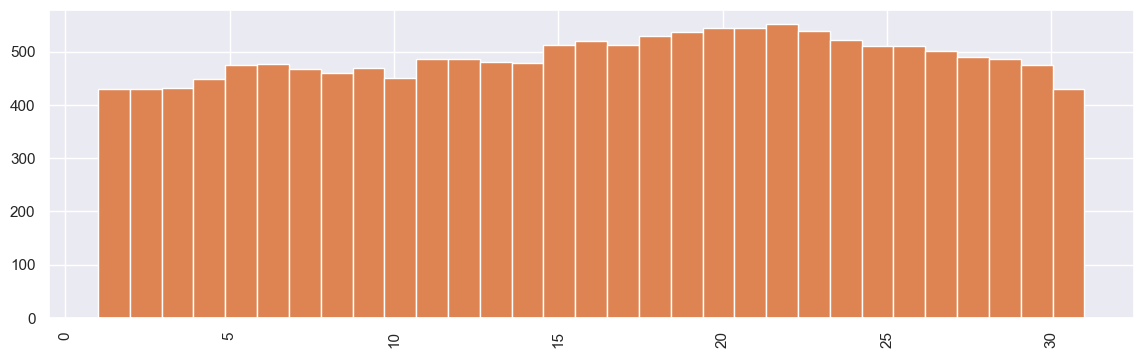

--------------------------------------------------
Histogram: WEEK


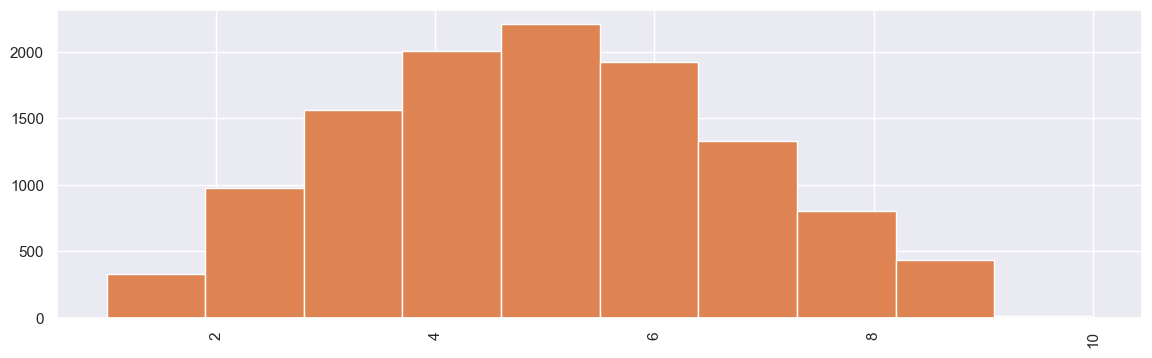

--------------------------------------------------
Histogram: CATCH_LBS


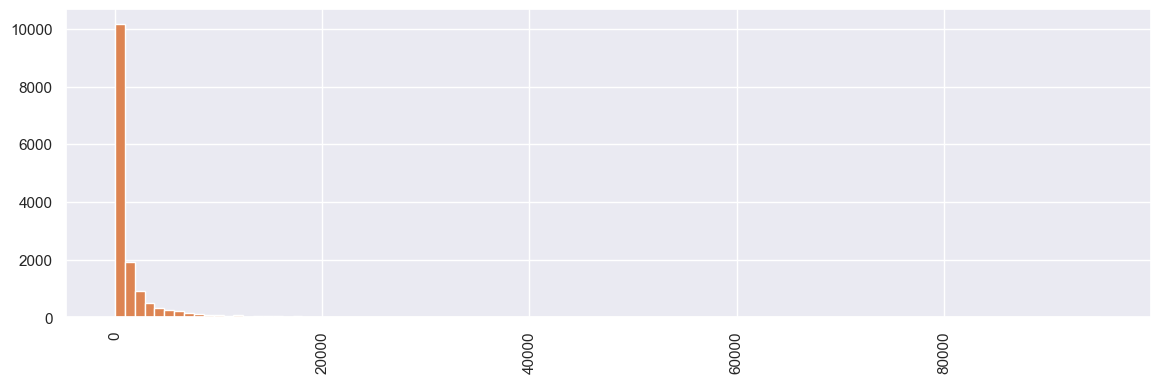

--------------------------------------------------
Histogram: CATCH_KG


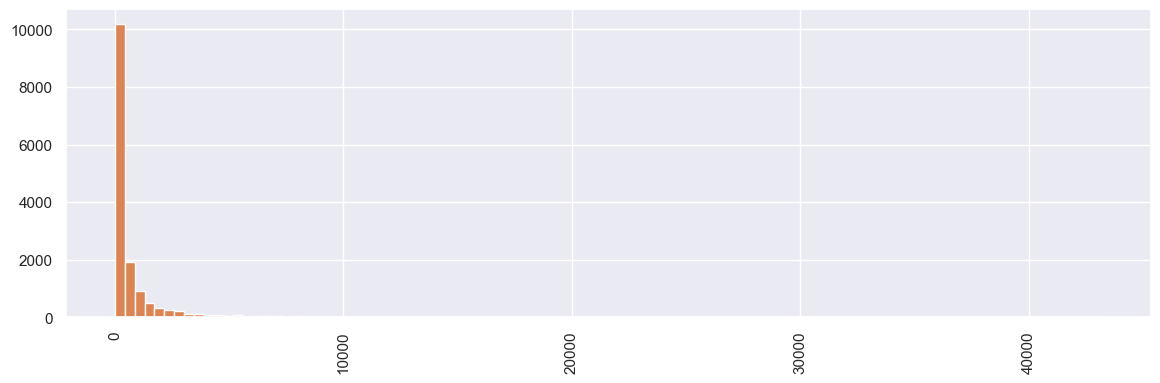

--------------------------------------------------
Histogram: HOURS_FISHED


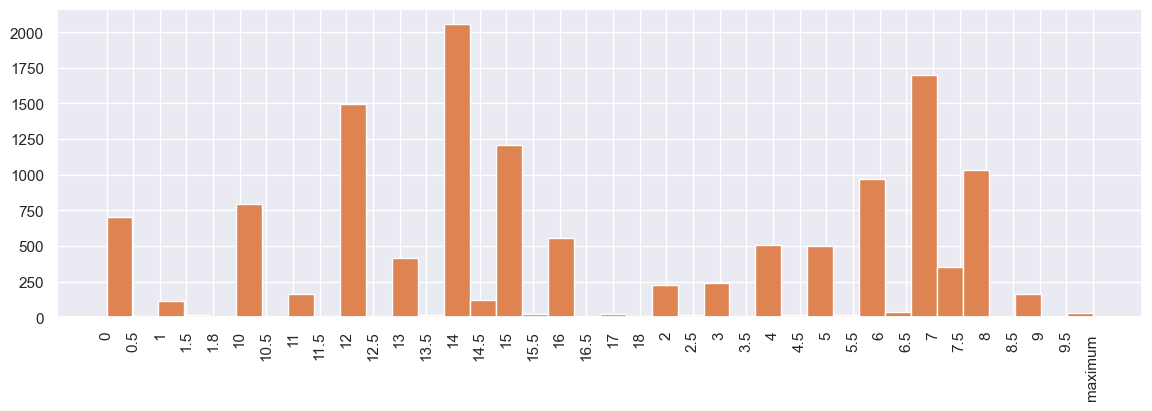

--------------------------------------------------
Histogram: ZONE


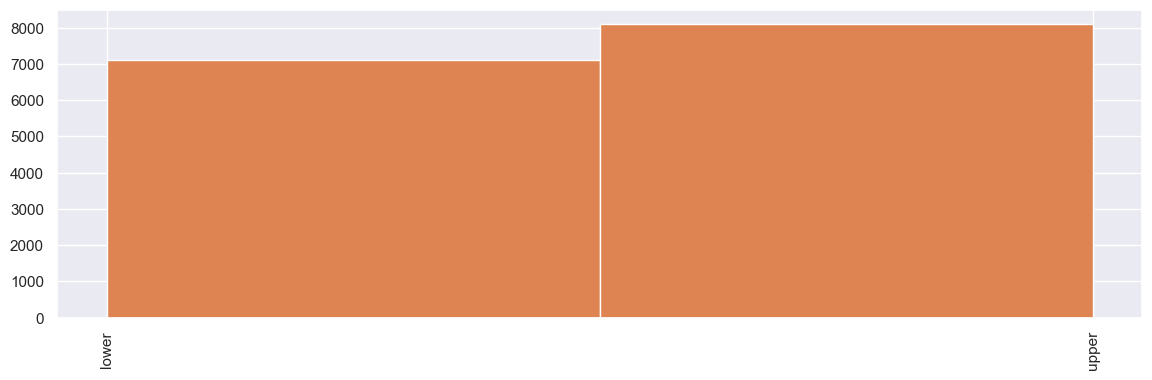

--------------------------------------------------
Histogram: LAST_NAME


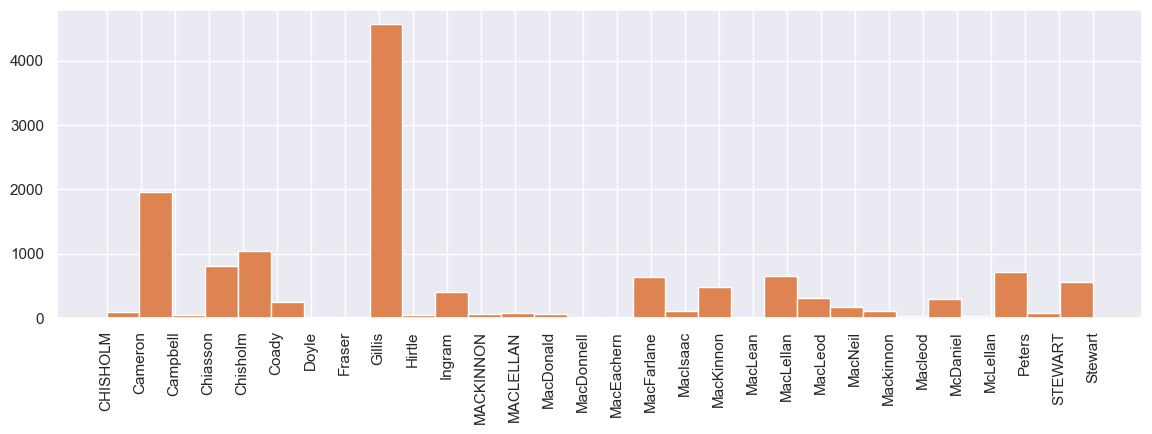

--------------------------------------------------
Histogram: SITE1


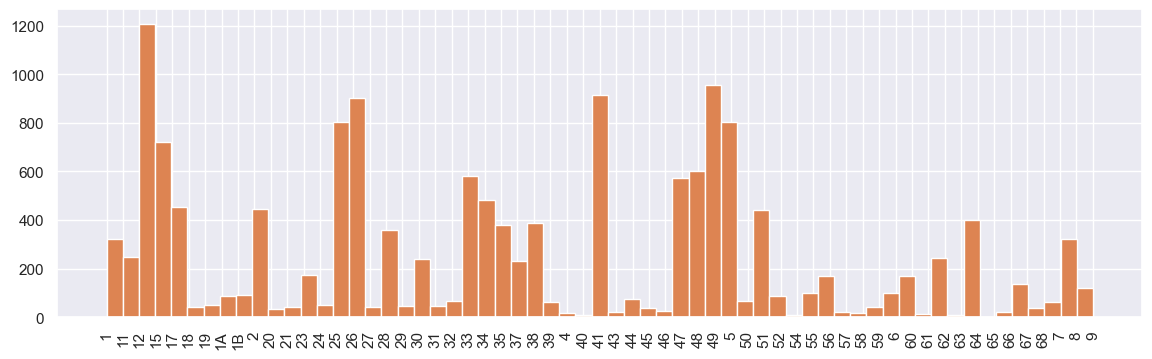

--------------------------------------------------
Histogram: SITE2


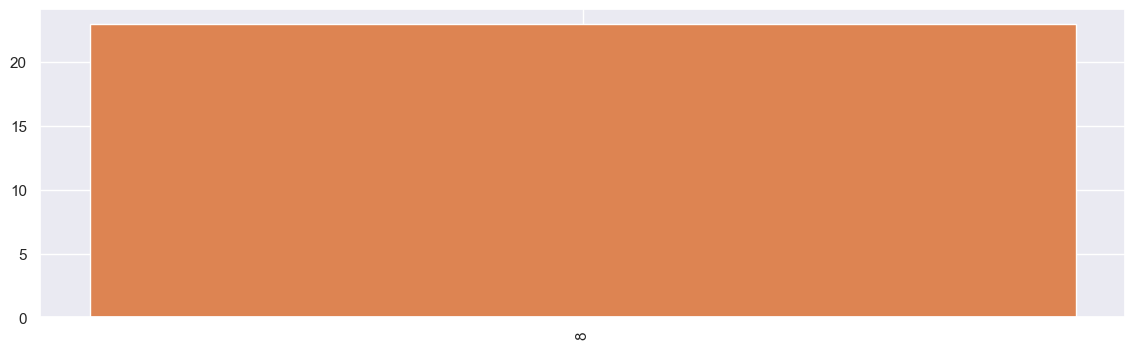

In [4]:
columns_with_no_data = ['DIST', 'RIVER', 'code', 'GEAR', ]
columns_to_print = [
    'SITE_NO', 'no_nets', 'YEAR', 'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 
    'hours_fished', 'zone', 'last_name', 'SITE1', 'SITE2'
]

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = df_SD[column].nunique()
    
    max_bins = 100
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins
    
    # need to sort columns or categorical values are all over the place (still not perfect, but way better)
    df_SD.sort_values(column)[column].hist(bins=bins, color=sns.color_palette()[1], xrot=90)
    
    plt.show()

# Time Series


-------------------------------------------------------
RIVER
CATEGORICAL


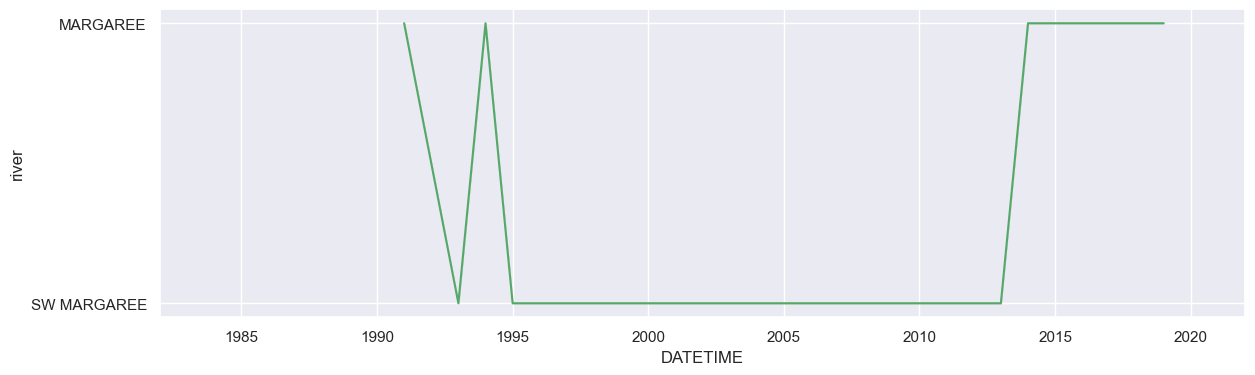


-------------------------------------------------------
SITE
CATEGORICAL


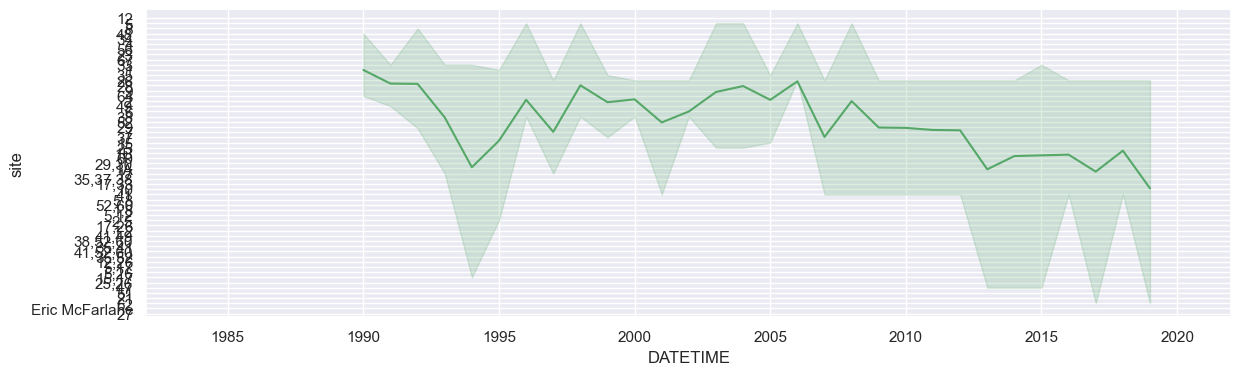


-------------------------------------------------------
LOC
CATEGORICAL


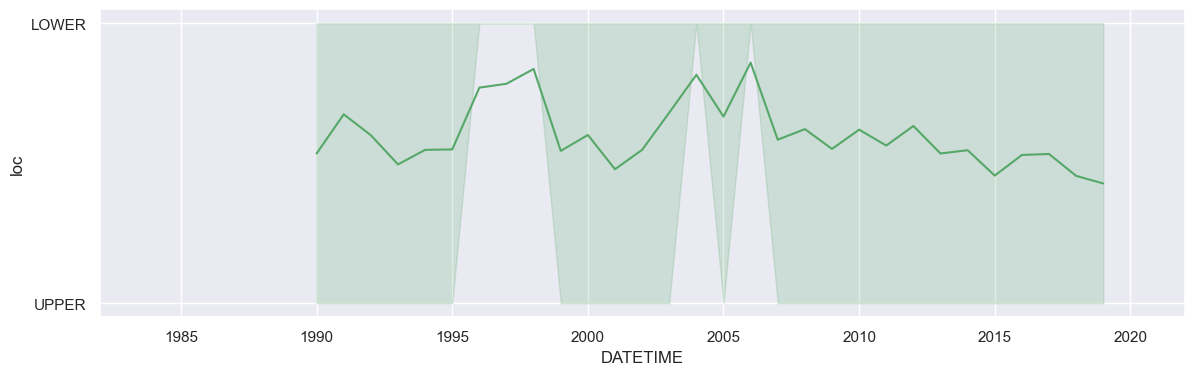


-------------------------------------------------------
PERIOD
CATEGORICAL


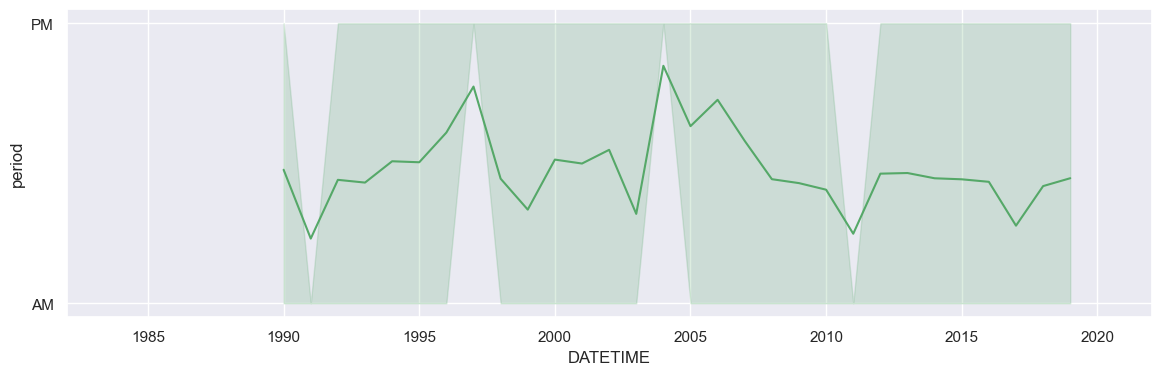


-------------------------------------------------------
WT_LBS
FLOAT


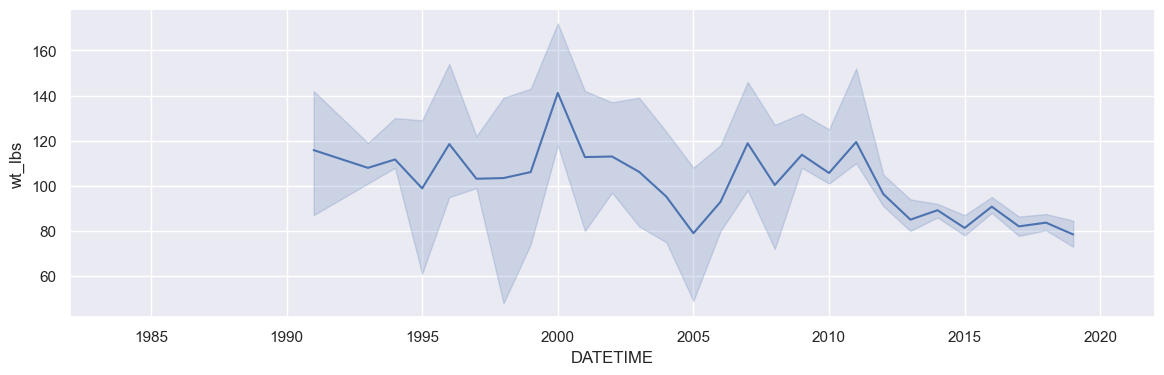


-------------------------------------------------------
WT_KG
FLOAT


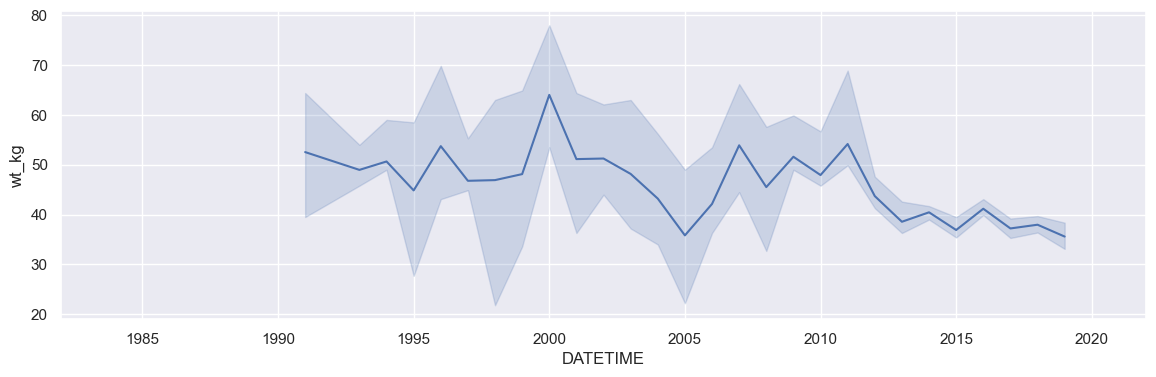


-------------------------------------------------------
LGTH
INT


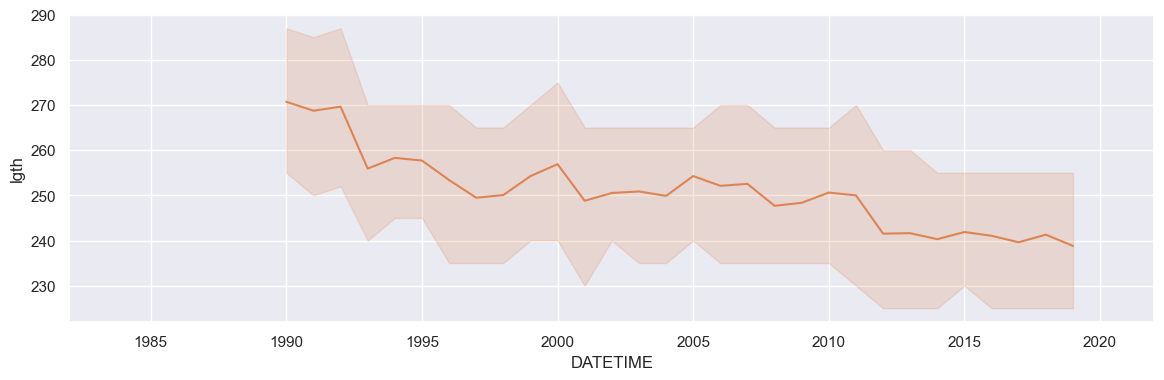


-------------------------------------------------------
FREQ
INT


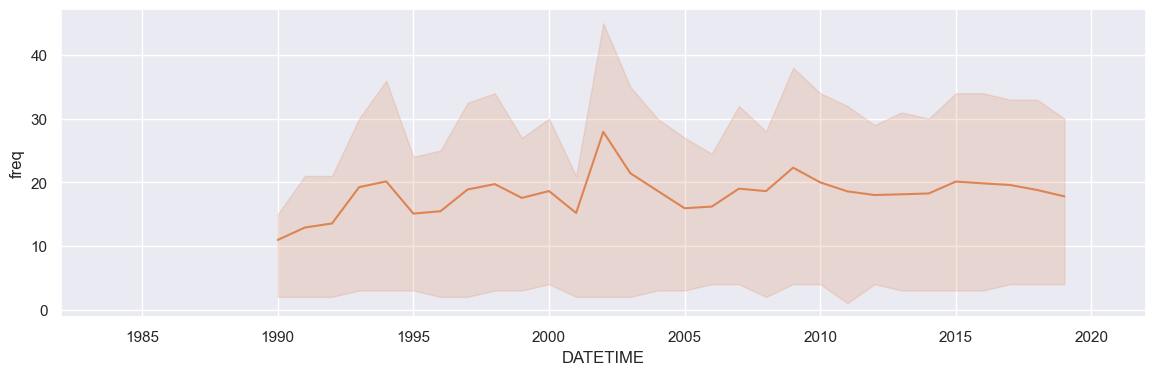


-------------------------------------------------------
FLBIN
INT


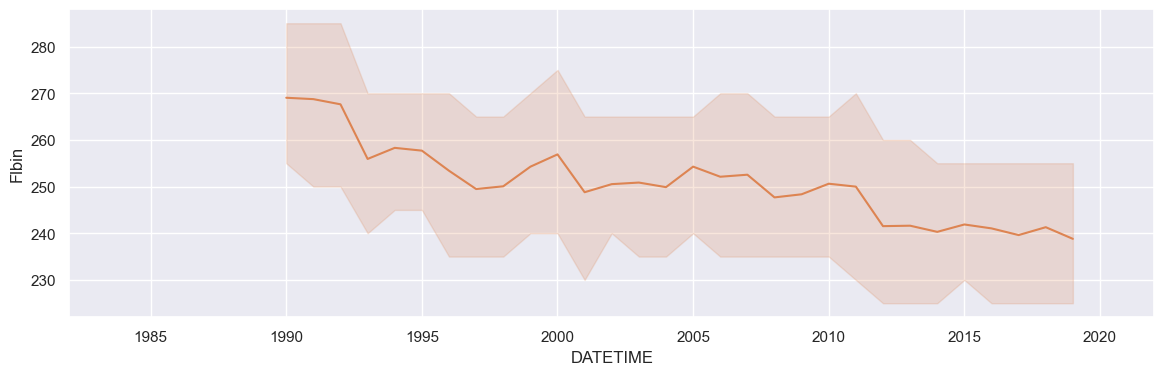


-------------------------------------------------------
SITE1
CATEGORICAL


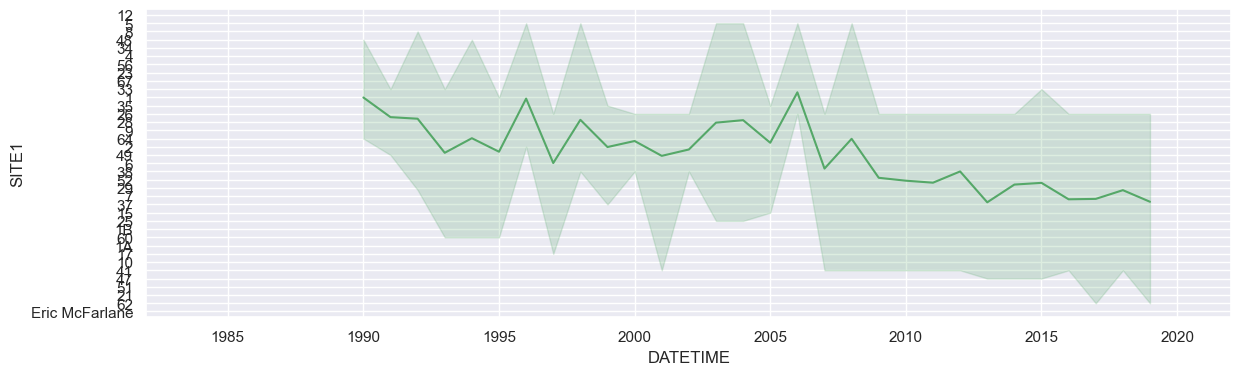


-------------------------------------------------------
SITE2
CATEGORICAL


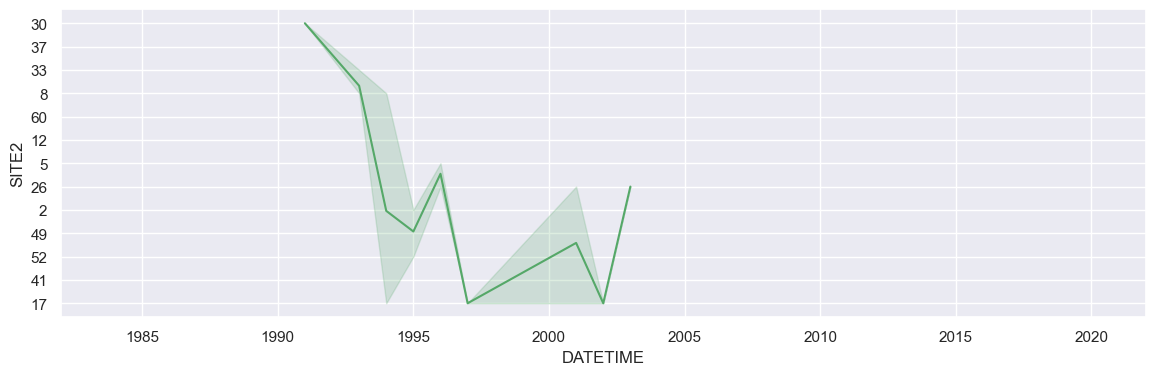


-------------------------------------------------------
SITE3
CATEGORICAL


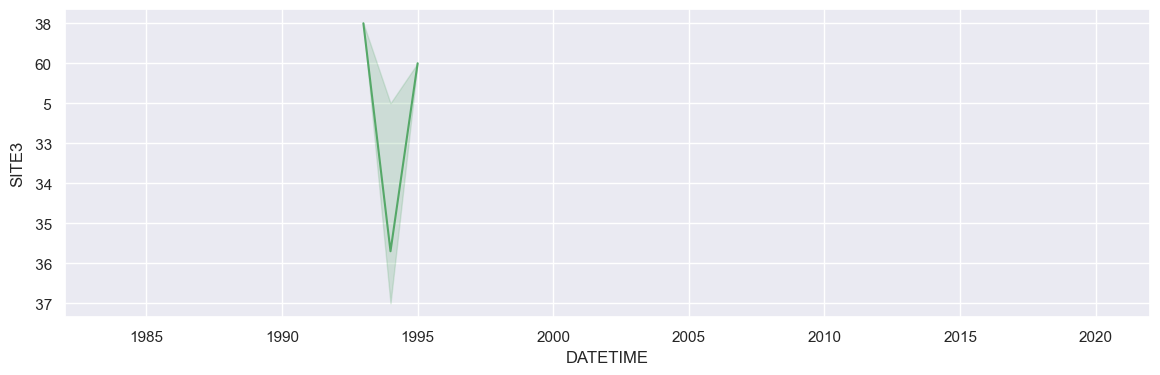

In [5]:
features = {
    'river': 'categorical',
    'site': 'categorical', 
    'loc': 'categorical', 
    'period': 'categorical', 
    'wt_lbs': 'float', 
    'wt_kg': 'float', 
    'lgth': 'integer',
    'freq': 'integer',
    'Flbin': 'integer',
    'SITE1': 'categorical',
    'SITE2': 'categorical',
    'SITE3': 'categorical'
}

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.upper(), sep='')
    plt.figure(figsize=(14, 4))
    
    if features[feature] == 'float':
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature], errorbar=('pi', 50), color=sns.color_palette()[0])
        print('FLOAT')
    elif features[feature] == 'integer':  # convert to float or get a ValueError
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature].astype(float), errorbar=('pi', 50), color=sns.color_palette()[1])
        print('INT')
    elif features[feature] == 'categorical':
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature], errorbar=('pi', 50), color=sns.color_palette()[2])
        print('CATEGORICAL')    
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    
    plt.show()

In [6]:
df_SD.columns

Index(['DIST', 'RIVER', 'NAME', 'code', 'GEAR', 'SITE_NO', 'no_nets', 'YEAR',
       'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 'hours_fished', 'zone',
       'last_name', 'comments', 'bycatch_sbass', 'bycatch_shad',
       'bycatch_other', 'SITE1', 'SITE2', 'DATETIME'],
      dtype='object')


-------------------------------------------------------
SITE_NO
CATEGORICAL


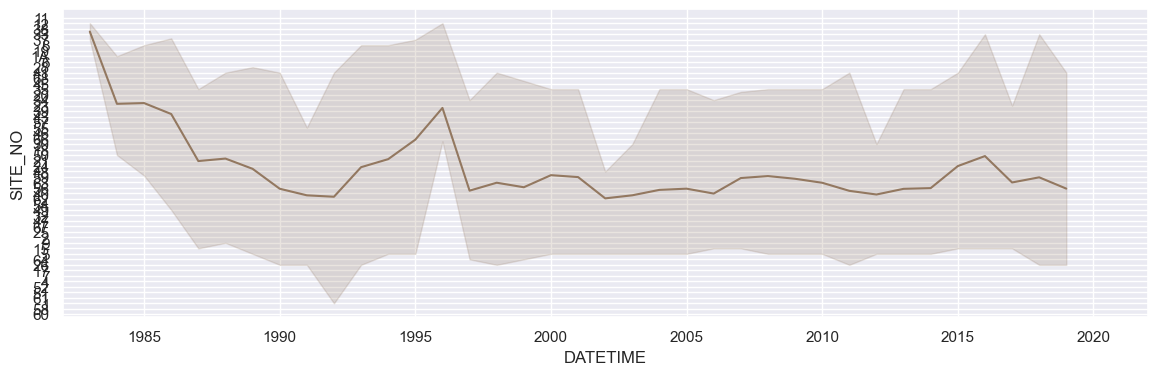


-------------------------------------------------------
NO_NETS
CATEGORICAL


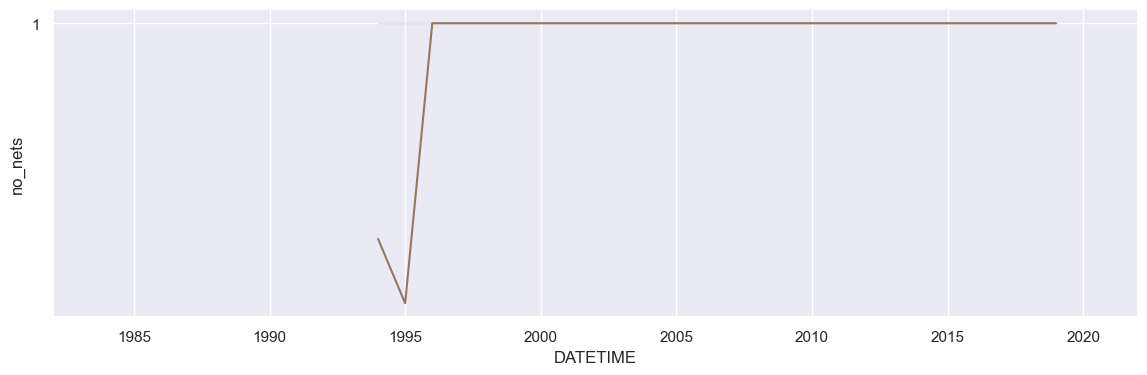


-------------------------------------------------------
CATCH_LBS
FLOAT


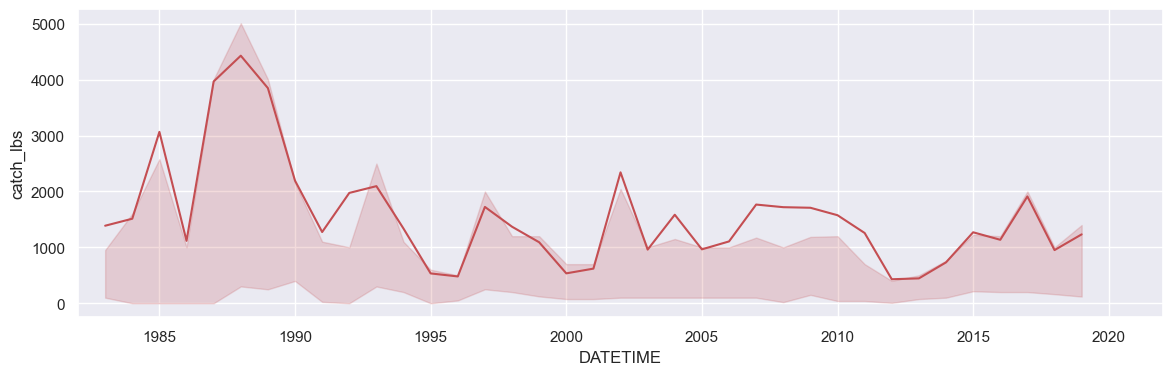


-------------------------------------------------------
CATCH_KG
FLOAT


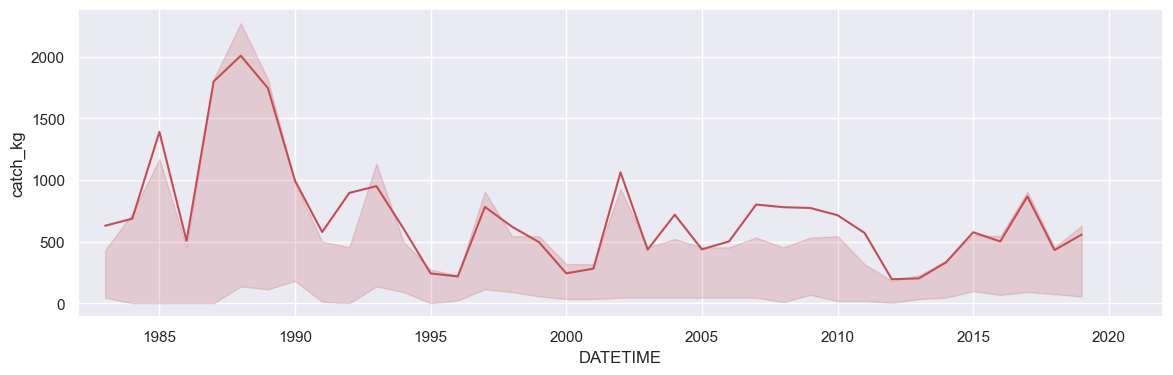


-------------------------------------------------------
ZONE
CATEGORICAL


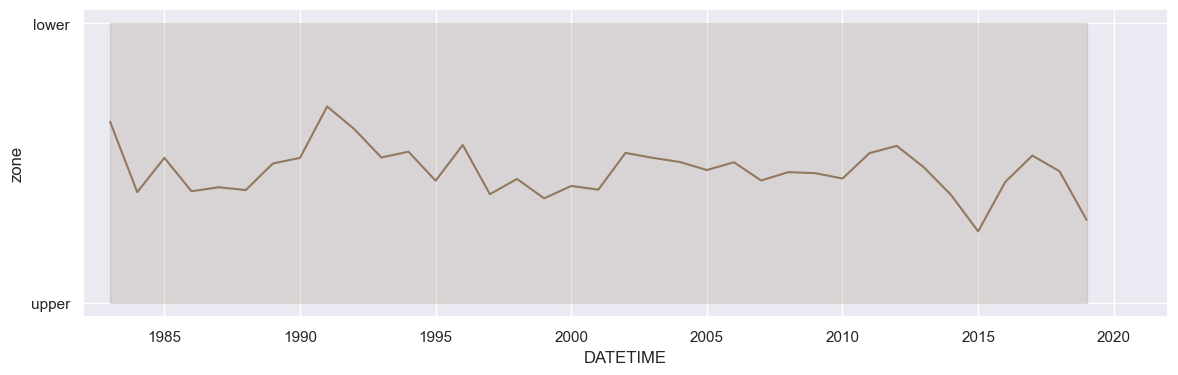


-------------------------------------------------------
LAST_NAME
CATEGORICAL


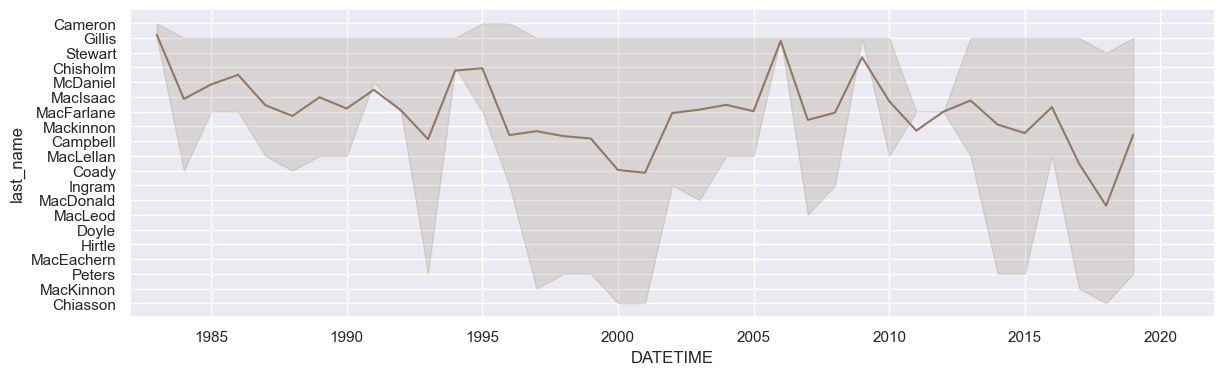


-------------------------------------------------------
HOURS_FISHED
FLOAT


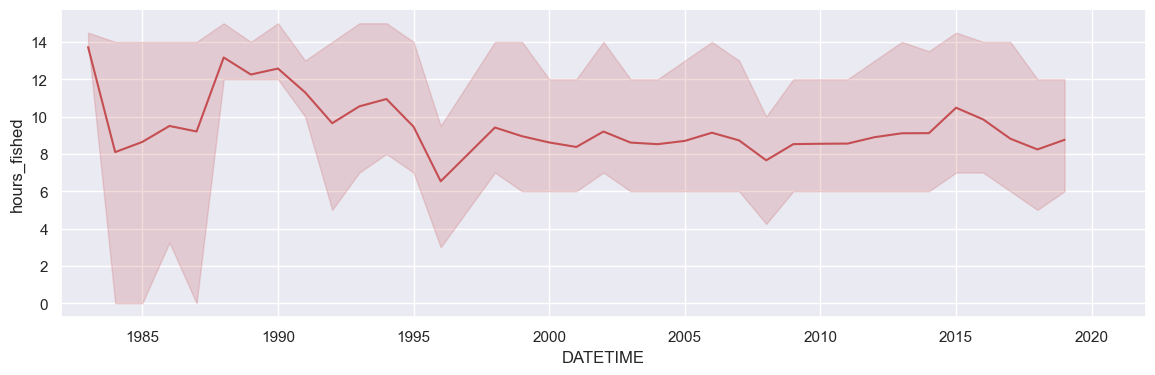


-------------------------------------------------------
SITE1
CATEGORICAL


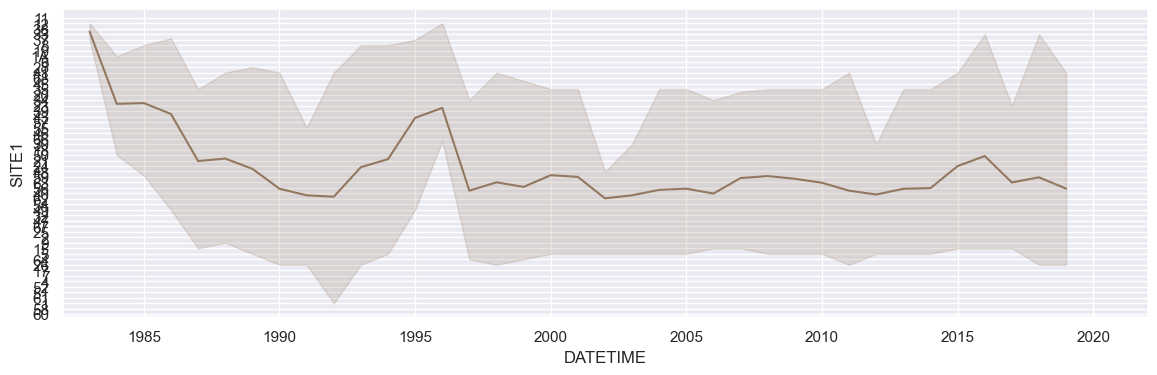


-------------------------------------------------------
SITE2
CATEGORICAL


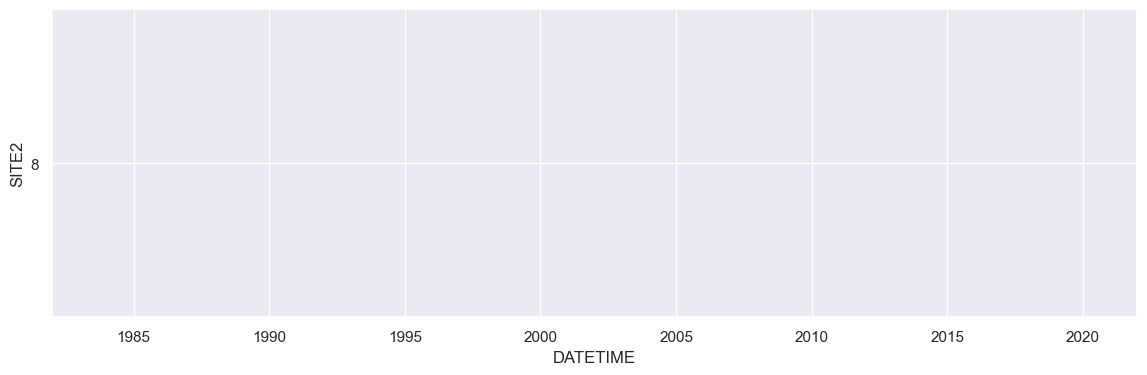

In [7]:
columns_with_no_data = ['DIST', 'RIVER', 'code', 'GEAR', ]
columns_to_print = [
    'SITE_NO', 'no_nets', 'YEAR', 'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 
    'hours_fished', 'zone', 'last_name', 'SITE1', 'SITE2'
]

features = {
    'SITE_NO': 'categorical',
    'no_nets': 'categorical',  
    'catch_lbs': 'float', 
    'catch_kg': 'float', 
    'zone': 'categorical',
    'last_name': 'categorical',
    'hours_fished': 'float',  # update this field in temp dataframe
    'SITE1': 'categorical',
    'SITE2': 'categorical'
}

df = df_SD.copy()
df.loc[df['hours_fished'] == 'maximum ', 'hours_fished'] = '24'
df['hours_fished'] = df['hours_fished'].astype(float)

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.upper(), sep='')
    plt.figure(figsize=(14, 4))
    
    if features[feature] == 'float':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[3])
        print('FLOAT')
    elif features[feature] == 'integer':  # convert to float or get a ValueError
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature].astype(float), errorbar=('pi', 50), color=sns.color_palette()[4])
        print('INT')
    elif features[feature] == 'categorical':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[5])
        print('CATEGORICAL')    
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    
    plt.show()

# Length Frequencies

In [8]:
df_LF.columns

Index(['yy', 'mm', 'dd', 'Time', 'river', 'week', 'site', 'loc', 'period',
       'wt_lbs', 'wt_kg', 'lgth', 'freq', 'Flbin', 'DATETIME', 'SITE1',
       'SITE2', 'SITE3'],
      dtype='object')

In [9]:
# almost every single row
df_LF.groupby(['DATETIME', 'site', 'lgth']).sum()['freq'].expanding().sum()

DATETIME    site  lgth
1990-05-07  12    250         1.000
                  253         2.000
                  255         4.000
                  258         6.000
                  260        13.000
                            ...    
2019-06-28  41    240    203897.000
                  245    203908.000
                  250    203914.000
                  255    203916.000
                  260    203917.000
Name: freq, Length: 11308, dtype: float64

In [10]:
# format in dm_apps is
    # id, count, length_bin_id, sample_id
    # NOTE: each bin gets an id, samples get consistent ids
    # can autogen the id, forget for now
    # use date and site to create sample id
        # CONFIRM THAT THIS COMBINATION IS DISTINCT

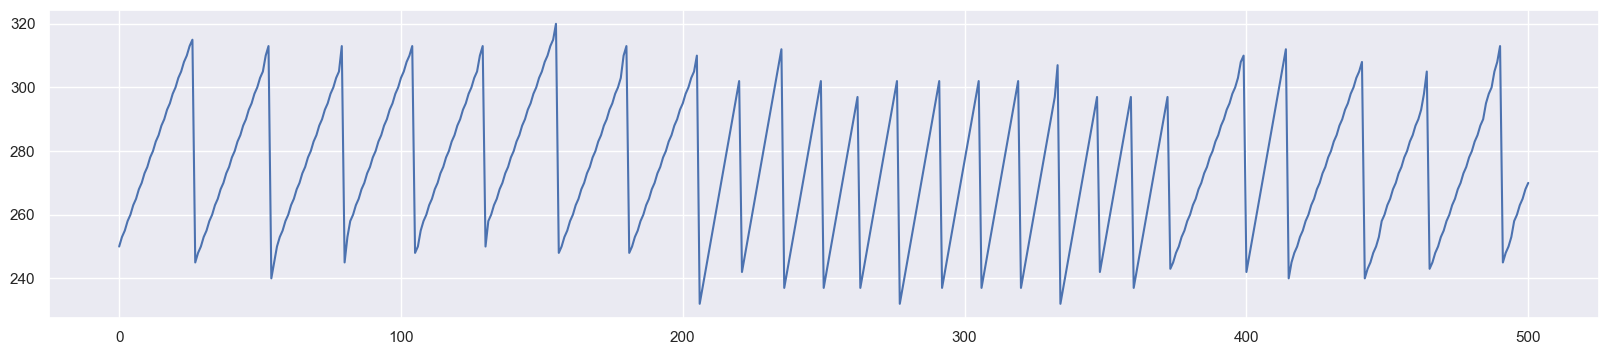

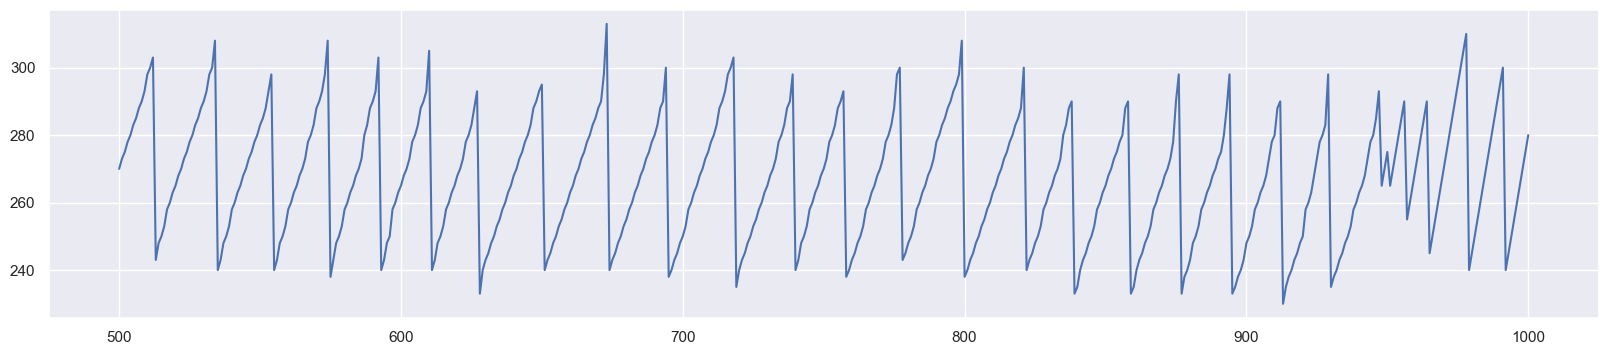

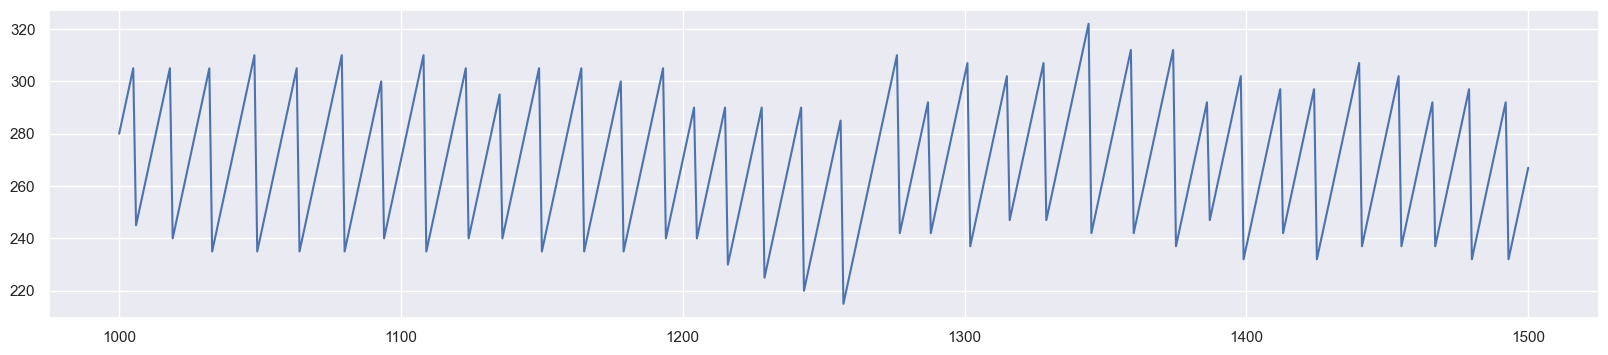

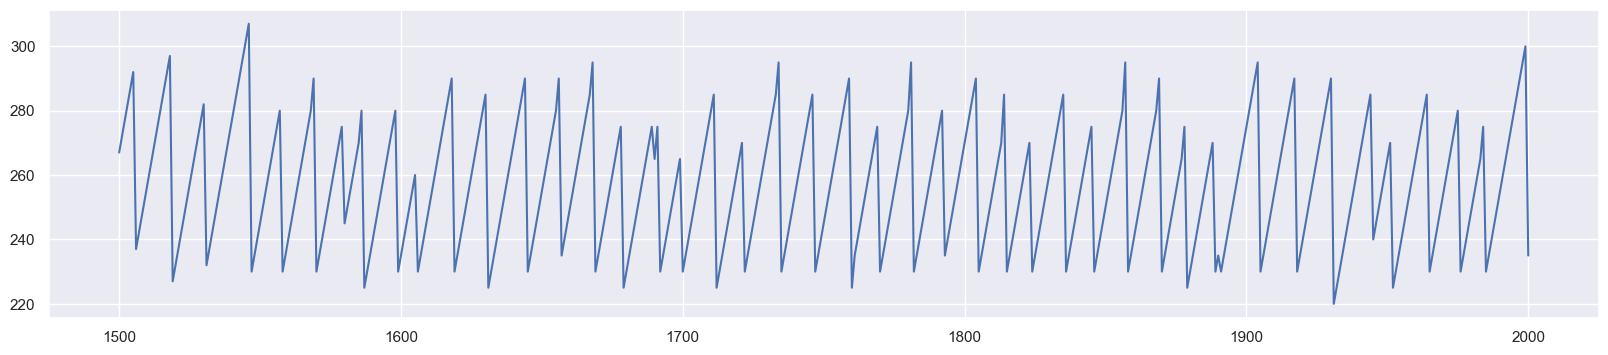

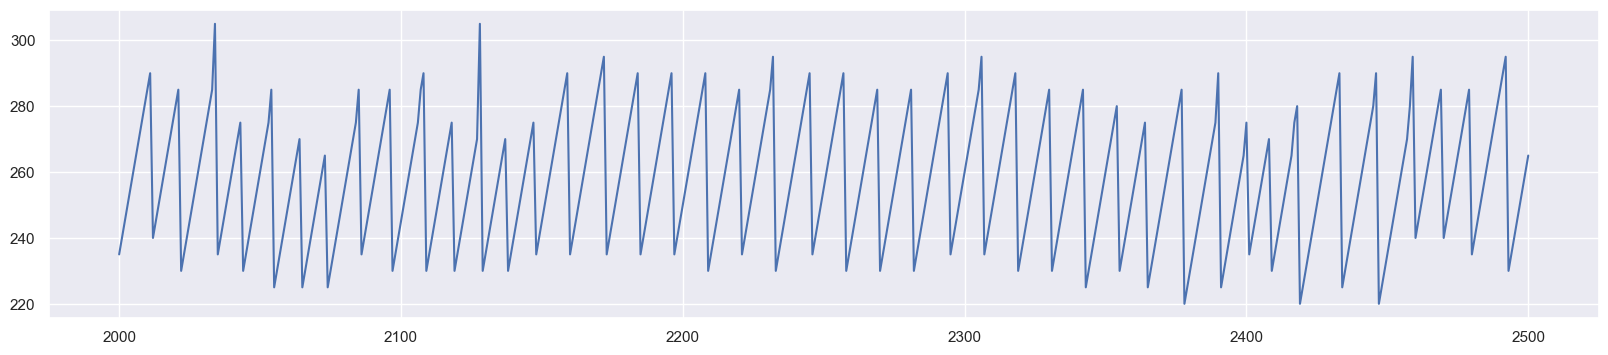

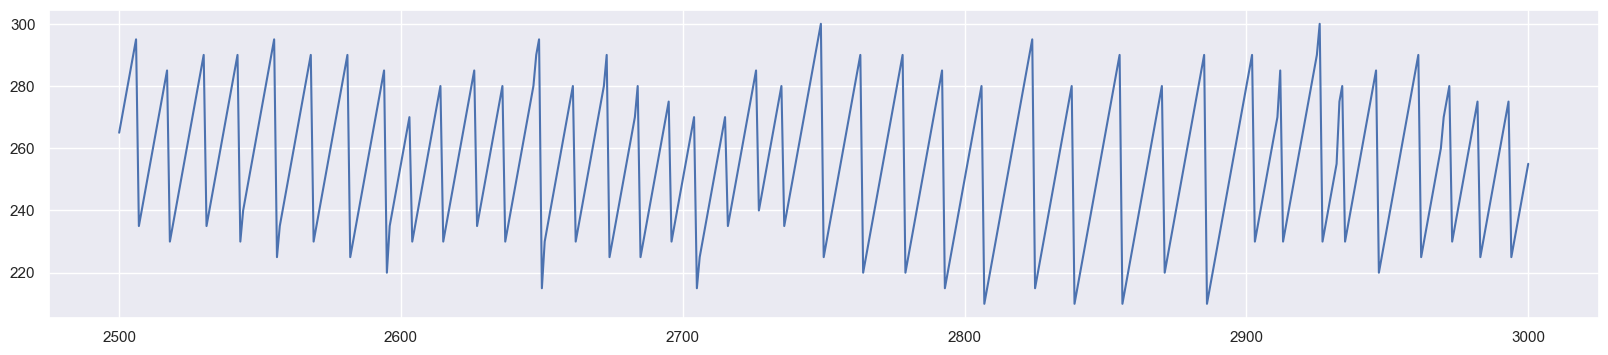

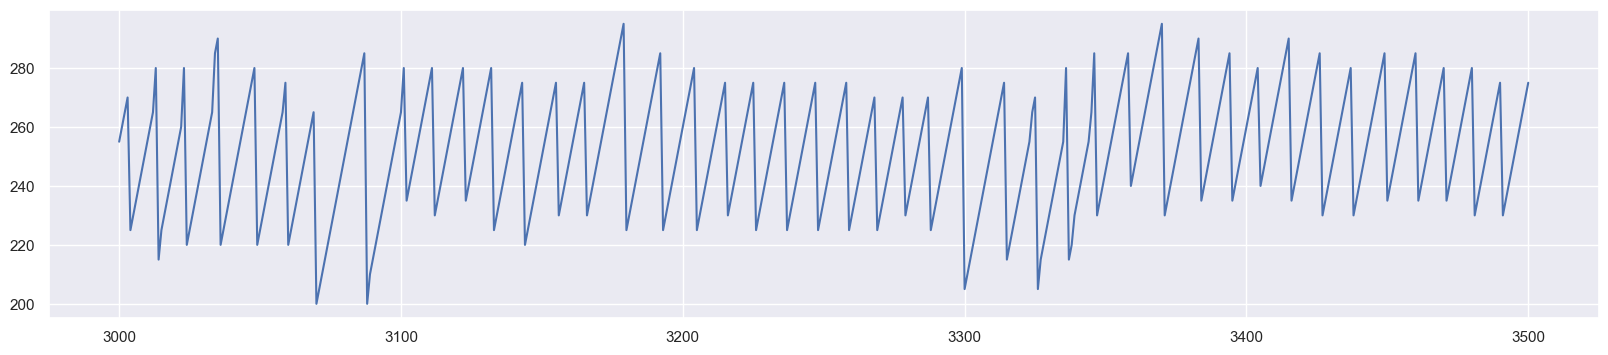

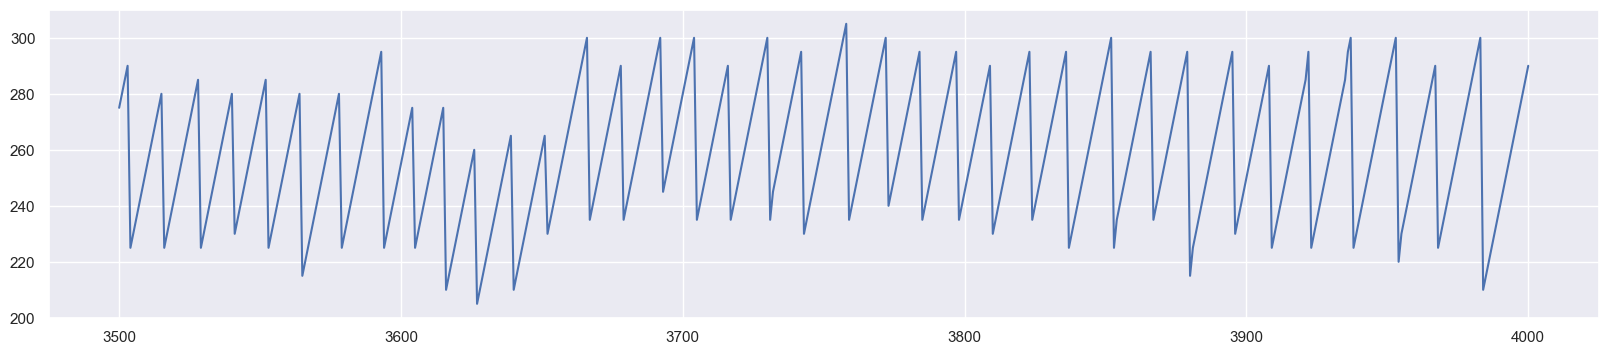

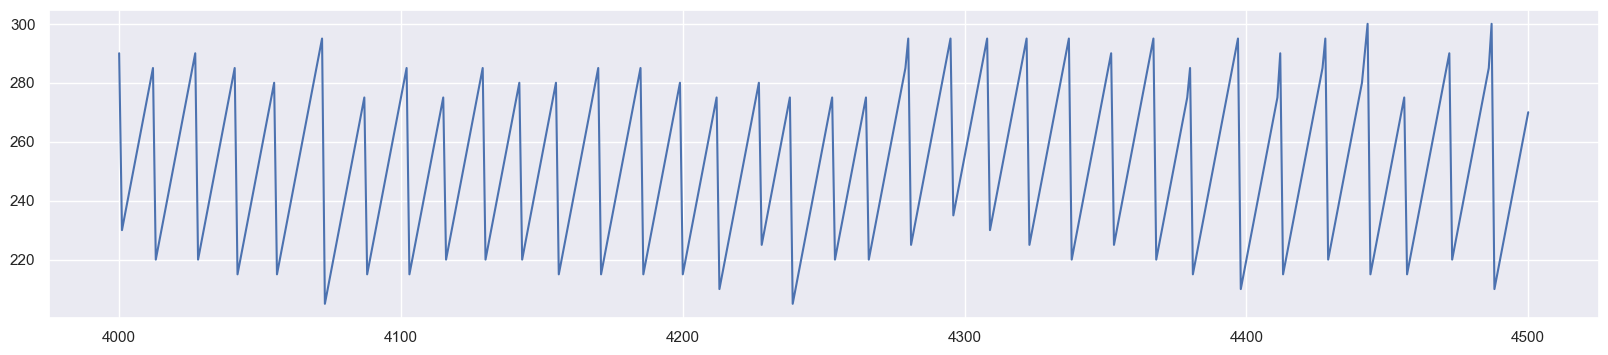

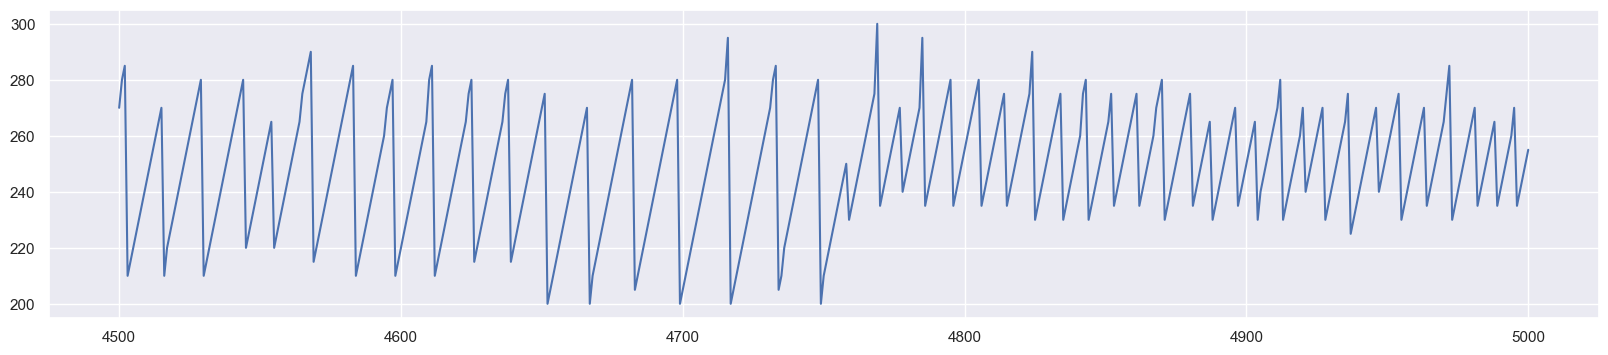

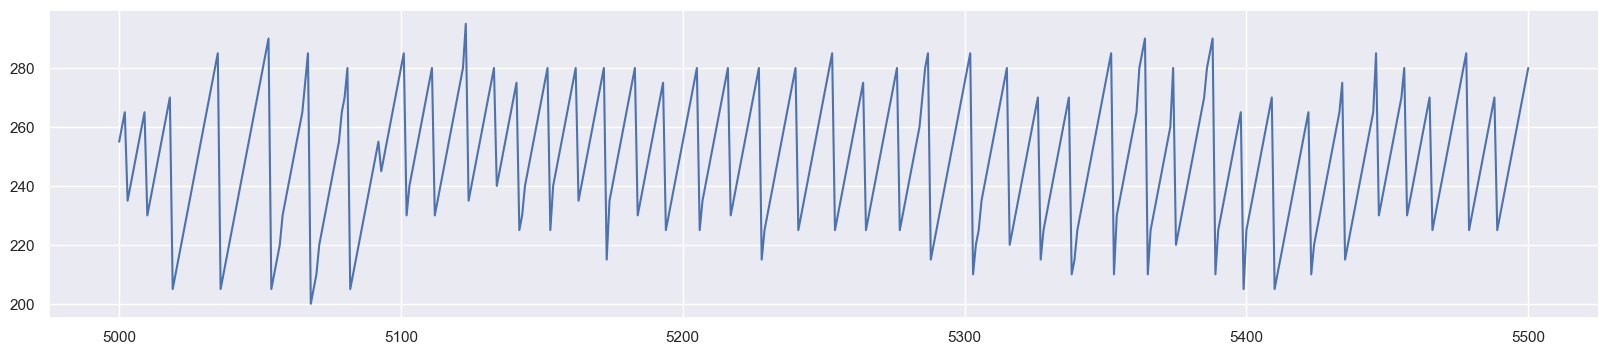

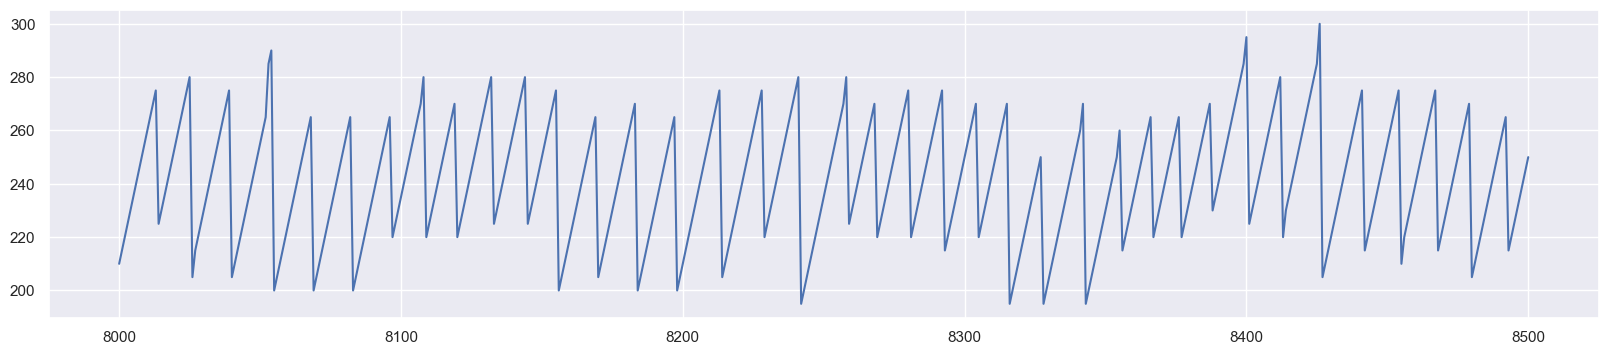

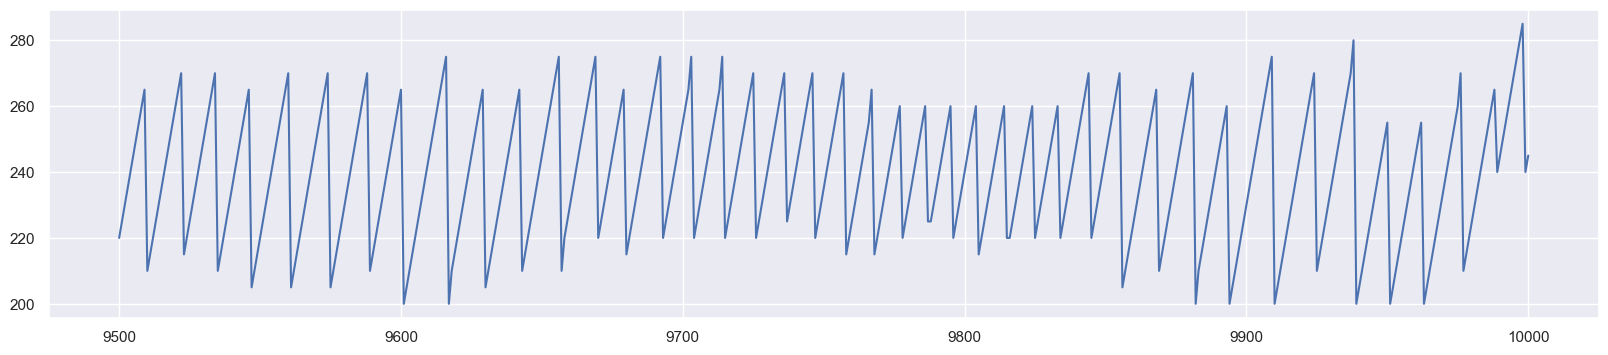

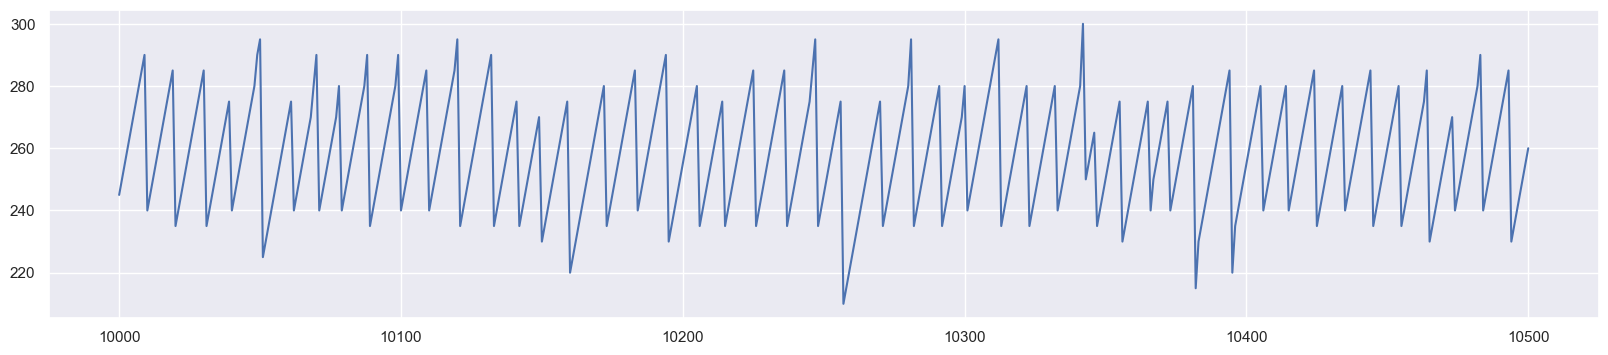

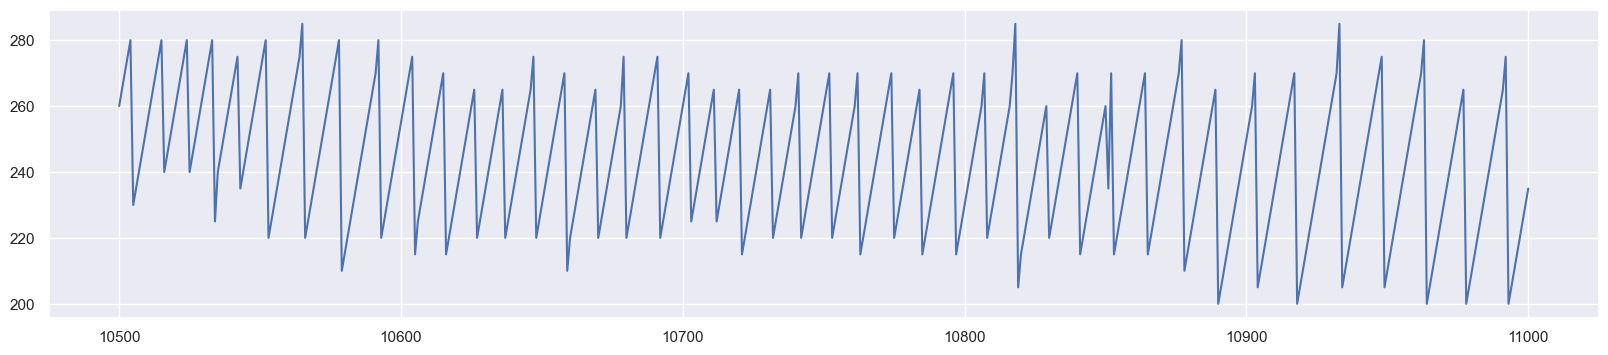

In [11]:
# check if all bins are in order
jumps = 500
i_max = df_LF.shape[0] // jumps

for i in range(i_max):
    if i == i_max:
        df_LF.loc[i*jumps:, 'lgth'].plot(figsize=(20, 4))
        plt.show()
    else:
        df_LF.loc[i*jumps:(i+1)*jumps, 'lgth'].plot(figsize=(20, 4))
        plt.show()

# LF bins

In [12]:
df_LF.head()

yy  mm  dd  Time river  week site    loc period  wt_lbs  wt_kg  lgth  \
0  1990   5   7   NaN   NaN     2   12  LOWER     PM     NaN    NaN   250   
1  1990   5   7   NaN   NaN     2   12  LOWER     PM     NaN    NaN   253   
2  1990   5   7   NaN   NaN     2   12  LOWER     PM     NaN    NaN   255   
3  1990   5   7   NaN   NaN     2   12  LOWER     PM     NaN    NaN   258   
4  1990   5   7   NaN   NaN     2   12  LOWER     PM     NaN    NaN   260   

   freq  Flbin   DATETIME SITE1 SITE2 SITE3  
0     1    250 1990-05-07    12  <NA>  <NA>  
1     1    250 1990-05-07    12  <NA>  <NA>  
2     2    255 1990-05-07    12  <NA>  <NA>  
3     2    255 1990-05-07    12  <NA>  <NA>  
4     7    260 1990-05-07    12  <NA>  <NA>

In [13]:
sum(df_LF.site.isnull())

69

In [14]:
# create a sub-id for site groupings (2 digits to save int space)

n_sites = df_LF.site.nunique()
site_n_generator = range(1, n_sites+1) # preserve 0 for 'no site indicated'

# lookup key = 'site', value = a 2 digit int
site_lookup = dict(zip(sorted([str(x) for x in df_LF.site.unique()]), site_n_generator))

# reverse lookup (with formatting)
reverse_site_lookup = {val: key.replace(', ',',') for key, val in site_lookup.items()}
reverse_site_lookup.update({0: 'no site noted', 99: 'id conflict, same as other id[:-2]'})  # could use better message if this is used

In [15]:
# 'unique' id column
df_LF['id'] = (
    df_LF.DATETIME.dt.year*1000_000 
    + df_LF.DATETIME.dt.month*10_000 
    + df_LF.DATETIME.dt.day*100 
    + df_LF.replace({'site': site_lookup}).site.fillna(0).astype(int)
)

# new sample indicator
df_LF['new_sample'] = df_LF.lgth.diff() < 0

# new id indicator
df_LF['new_id'] = df_LF.id.diff() != 0

In [16]:
# there are 11 duplicates. these will need new ids
sum(df_LF[df_LF.new_sample].id.diff() == 0)

11

In [17]:
# these are the duplicates
df_LF.loc[df_LF.new_sample & ~df_LF.new_id]

yy  mm  dd     Time        river  week site    loc period  wt_lbs  \
3112   1998   5   1      NaN  SW MARGAREE     1    5  LOWER     AM 132.000   
4171   2000   6   7      NaN  SW MARGAREE     6   26  LOWER     PM 158.000   
4200   2000   6   9      NaN  SW MARGAREE     6   26  LOWER     AM 146.000   
4254   2000   6  15      NaN  SW MARGAREE     7   38  UPPER     AM  57.000   
5194   2003   5  23      NaN  SW MARGAREE     4   26  LOWER     PM  47.000   
6343   2009   5  20 1405.000  SW MARGAREE     4   26  LOWER     PM  96.000   
6379   2009   5  22 1455.000  SW MARGAREE     4   26  LOWER     PM 130.000   
6659   2010   5  11 1540.000  SW MARGAREE     3   26  LOWER     PM  36.000   
6732   2010   5  19 1630.000  SW MARGAREE     4   26  LOWER     PM 100.000   
6857   2010   5  27 1500.000  SW MARGAREE     5   26  LOWER     PM 121.000   
10851  2018   6  13      NaN     MARGAREE     7   64  UPPER     PM  92.000   

       wt_kg  lgth  freq  Flbin            DATETIME SITE1 SITE2 SITE3  \
3112  59.900   230     4    230 1998-05-01 00:00:00     5  <NA>  <NA>   
4171  71.700   215     3    215 2000-06-07 00:00:00    26  <NA>  <NA>   
4200  66.200   215     1    215 2000-06-09 00:00:00    26  <NA>  <NA>   
4254  25.900   220     1    220 2000-06-15 00:00:00    38  <NA>  <NA>   
5194  21.300   225     2    225 2003-05-23 00:00:00    26  <NA>  <NA>   
6343  43.500   225     1    225 2009-05-20 14:05:00    26  <NA>  <NA>   
6379  59.000   225     3    225 2009-05-22 14:55:00    26  <NA>  <NA>   
6659  16.300   235     1    235 2010-05-11 15:40:00    26  <NA>  <NA>   
6732  45.400   220     1    220 2010-05-19 16:30:00    26  <NA>  <NA>   
6857  54.900   230    19    230 2010-05-27 15:00:00    26  <NA>  <NA>   
10851 41.700   235     2    235 2018-06-13 00:00:00    64  <NA>  <NA>   

               id  new_sample  new_id  
3112   1998050170        True   False  
4171   2000060723        True   False  
4200   2000060923        True   False  
4254   2000061538        True   False  
5194   2003052323        True   False  
6343   2009052023        True   False  
6379   2009052223        True   False  
6659   2010051123        True   False  
6732   2010051923        True   False  
6857   2010052723        True   False  
10851  2018061384        True   False

In [18]:
# let's see if we can tweak the DATETIME portion with hours to get rid of the ambiguity
dupe_ids = list(df_LF.loc[df_LF.new_sample & ~df_LF.new_id].id)

In [19]:
# nope. time data will not help (in all cases)
# there are only doubles, no triples or bigger, so changing the id to 99 should suffice in all cases
df_LF.loc[df_LF.id.isin(dupe_ids) & df_LF.new_sample]

yy  mm  dd     Time        river  week site    loc period  wt_lbs  \
3102   1998   5   1      NaN  SW MARGAREE     1    5  LOWER     PM  10.000   
3112   1998   5   1      NaN  SW MARGAREE     1    5  LOWER     AM 132.000   
4156   2000   6   7      NaN  SW MARGAREE     6   26  LOWER     AM 158.000   
4171   2000   6   7      NaN  SW MARGAREE     6   26  LOWER     PM 158.000   
4186   2000   6   9      NaN  SW MARGAREE     6   26  LOWER     PM 141.000   
4200   2000   6   9      NaN  SW MARGAREE     6   26  LOWER     AM 146.000   
4239   2000   6  15      NaN  SW MARGAREE     7   38  UPPER     PM 139.000   
4254   2000   6  15      NaN  SW MARGAREE     7   38  UPPER     AM  57.000   
5184   2003   5  23      NaN  SW MARGAREE     4   26  LOWER     AM  30.000   
5194   2003   5  23      NaN  SW MARGAREE     4   26  LOWER     PM  47.000   
6332   2009   5  20 1255.000  SW MARGAREE     4   26  LOWER     AM 139.000   
6343   2009   5  20 1405.000  SW MARGAREE     4   26  LOWER     PM  96.000   
6368   2009   5  22 1310.000  SW MARGAREE     4   26  LOWER     AM 128.000   
6379   2009   5  22 1455.000  SW MARGAREE     4   26  LOWER     PM 130.000   
6648   2010   5  11 1450.000  SW MARGAREE     3   26  LOWER     AM  43.000   
6659   2010   5  11 1540.000  SW MARGAREE     3   26  LOWER     PM  36.000   
6719   2010   5  19 1345.000  SW MARGAREE     4   26  LOWER     AM 129.000   
6732   2010   5  19 1630.000  SW MARGAREE     4   26  LOWER     PM 100.000   
6846   2010   5  27  840.000  SW MARGAREE     5   26  LOWER     AM 117.000   
6857   2010   5  27 1500.000  SW MARGAREE     5   26  LOWER     PM 121.000   
10841  2018   6  13      NaN     MARGAREE     7   64  UPPER     PM  92.000   
10851  2018   6  13      NaN     MARGAREE     7   64  UPPER     PM  92.000   

       wt_kg  lgth  freq  Flbin            DATETIME SITE1 SITE2 SITE3  \
3102   4.500   235     1    235 1998-05-01 00:00:00     5  <NA>  <NA>   
3112  59.900   230     4    230 1998-05-01 00:00:00     5  <NA>  <NA>   
4156  71.700   215     1    215 2000-06-07 00:00:00    26  <NA>  <NA>   
4171  71.700   215     3    215 2000-06-07 00:00:00    26  <NA>  <NA>   
4186  64.000   215     3    215 2000-06-09 00:00:00    26  <NA>  <NA>   
4200  66.200   215     1    215 2000-06-09 00:00:00    26  <NA>  <NA>   
4239  63.000   205     1    205 2000-06-15 00:00:00    38  <NA>  <NA>   
4254  25.900   220     1    220 2000-06-15 00:00:00    38  <NA>  <NA>   
5184  13.600   230     2    230 2003-05-23 00:00:00    26  <NA>  <NA>   
5194  21.300   225     2    225 2003-05-23 00:00:00    26  <NA>  <NA>   
6332  63.000   220     1    220 2009-05-20 12:55:00    26  <NA>  <NA>   
6343  43.500   225     1    225 2009-05-20 14:05:00    26  <NA>  <NA>   
6368  58.100   225     2    225 2009-05-22 13:10:00    26  <NA>  <NA>   
6379  59.000   225     3    225 2009-05-22 14:55:00    26  <NA>  <NA>   
6648  19.500   230     3    230 2010-05-11 14:50:00    26  <NA>  <NA>   
6659  16.300   235     1    235 2010-05-11 15:40:00    26  <NA>  <NA>   
6719  58.500   225     2    225 2010-05-19 13:45:00    26  <NA>  <NA>   
6732  45.400   220     1    220 2010-05-19 16:30:00    26  <NA>  <NA>   
6846  53.100   225     1    225 2010-05-27 08:40:00    26  <NA>  <NA>   
6857  54.900   230    19    230 2010-05-27 15:00:00    26  <NA>  <NA>   
10841 41.700   215     1    215 2018-06-13 00:00:00    64  <NA>  <NA>   
10851 41.700   235     2    235 2018-06-13 00:00:00    64  <NA>  <NA>   

               id  new_sample  new_id  
3102   1998050170        True    True  
3112   1998050170        True   False  
4156   2000060723        True    True  
4171   2000060723        True   False  
4186   2000060923        True    True  
4200   2000060923        True   False  
4239   2000061538        True    True  
4254   2000061538        True   False  
5184   2003052323        True    True  
5194   2003052323        True   False  
6332   2009052023        True    True  
6343   2009052023        True   False  
6368   2009052

In [20]:
# replace last 2 digits of ids with 99 if ids are duplicated
df_LF.loc[
    df_LF.new_sample
    & ~df_LF.new_id,
    'id'
] = df_LF.loc[
    df_LF.new_sample
    & ~df_LF.new_id,
    'id'
] - df_LF.loc[
    df_LF.new_sample
    & ~df_LF.new_id,
    'id'
] % 100 + 99

In [21]:
# looks good
df_LF.loc[
    df_LF.new_sample
    & ~df_LF.new_id,
    'id'
]

3112     1998050199
4171     2000060799
4200     2000060999
4254     2000061599
5194     2003052399
6343     2009052099
6379     2009052299
6659     2010051199
6732     2010051999
6857     2010052799
10851    2018061399
Name: id, dtype: int64

In [22]:
# use the same bins as used in the herring database
df_LF['length_bin_id'] = (df_LF.lgth - df_LF.lgth % 5) / 10

In [23]:
# error check: how many total fish cm (binned)
(df_LF['length_bin_id'] * df_LF['freq']).sum()

5076496.0

In [24]:
gaspereau_lengthfrequency = df_LF.groupby(['id', 'length_bin_id']).sum('freq').reset_index()[['freq', 'length_bin_id', 'id']].rename({
    'freq': 'count', 
    'length_bin_id': 'length_bin_id', 
    'id': 'sample_id'
}, axis=1)

In [25]:
# LOOKS GOOD: error check: how many total fish cm (binned)
(gaspereau_lengthfrequency['length_bin_id'] * gaspereau_lengthfrequency['count']).sum()

5076496.0

# Save the gaspereau_lengthfrequency table

In [26]:
# this can link to herring_lengthbin (it goes from 0 to 200cm - more than enough)
if False:  # change this to overwrite/resave
    gaspereau_lengthfrequency.to_pickle('gaspereau_lengthfrequency.pickle')

In [31]:
# lets look at a few histograms, just to check
sample_ids = gaspereau_lengthfrequency.sample_id.unique()

----------------------------------------------
Histogram: 2003053138


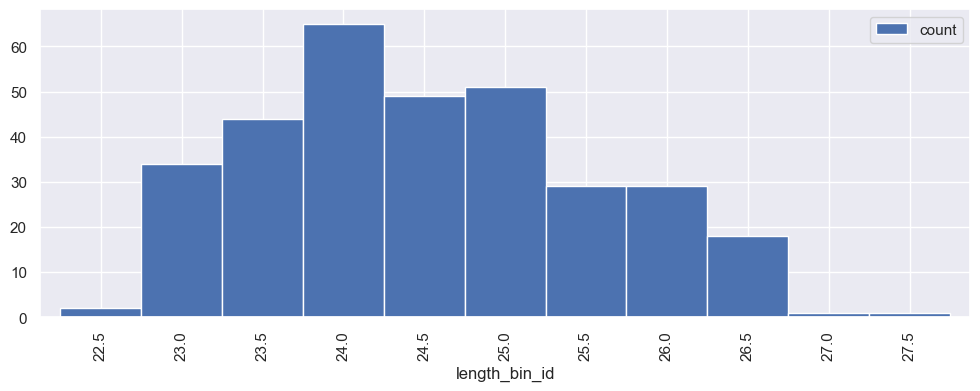

----------------------------------------------
Histogram: 1995052541


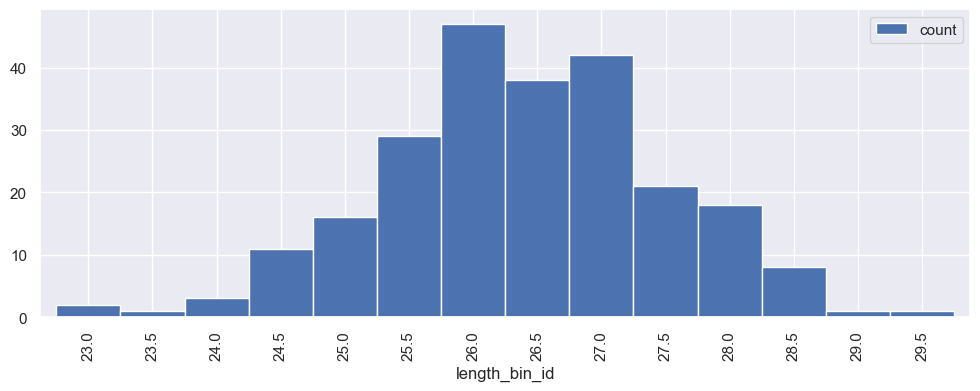

----------------------------------------------
Histogram: 1999052031


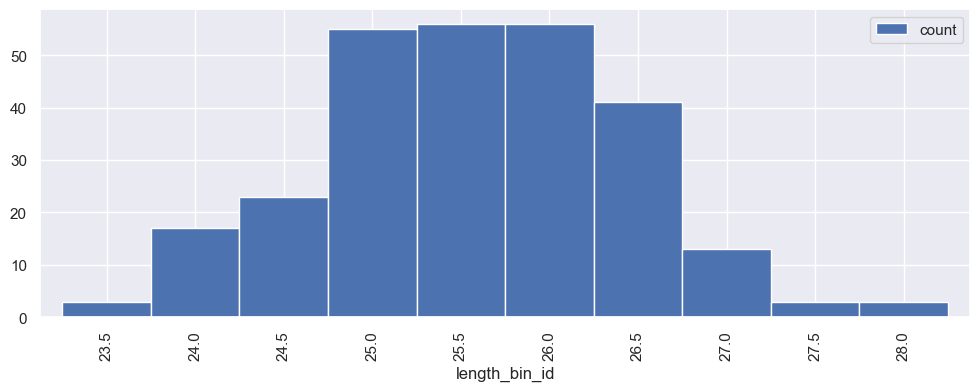

----------------------------------------------
Histogram: 1998061310


----------------------------------------------
Histogram: 1994060732


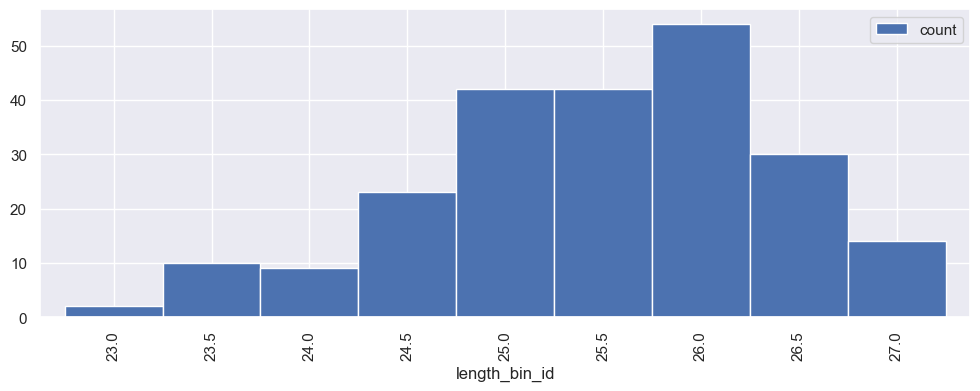

----------------------------------------------
Histogram: 2008051323


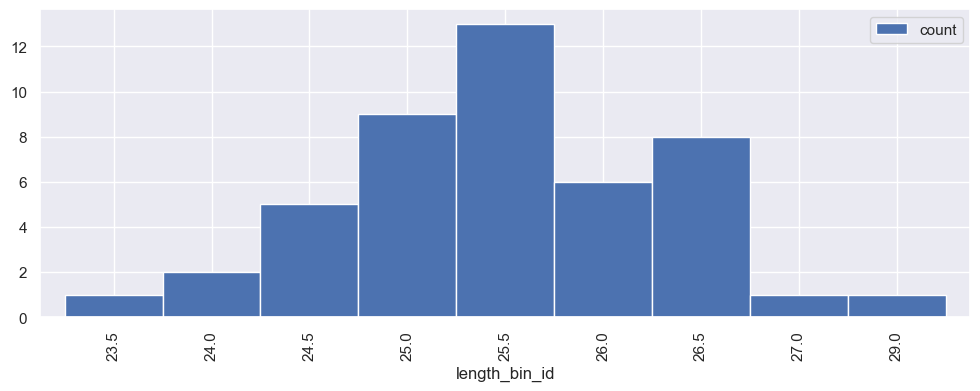

----------------------------------------------
Histogram: 2003062670


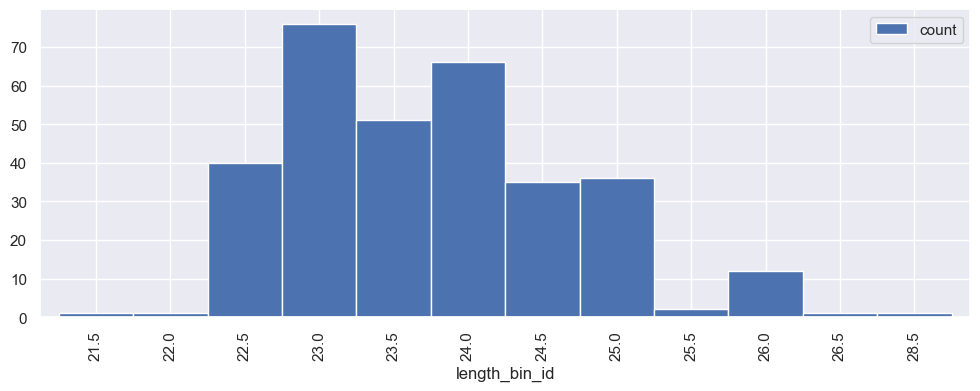

----------------------------------------------
Histogram: 1993052080


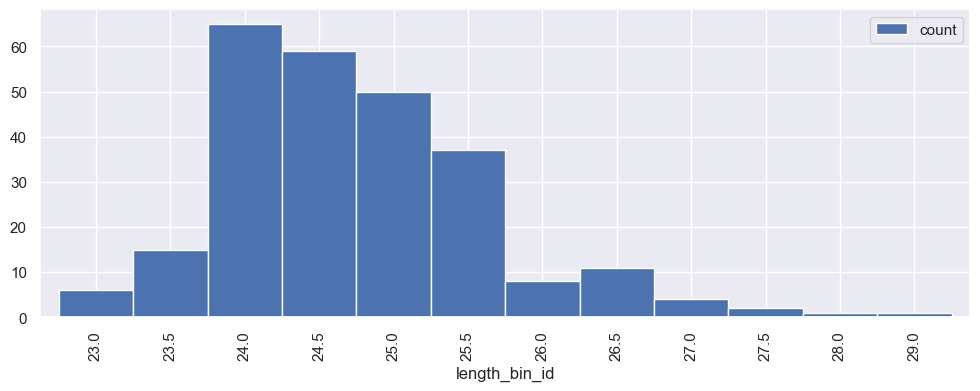

----------------------------------------------
Histogram: 2016051705


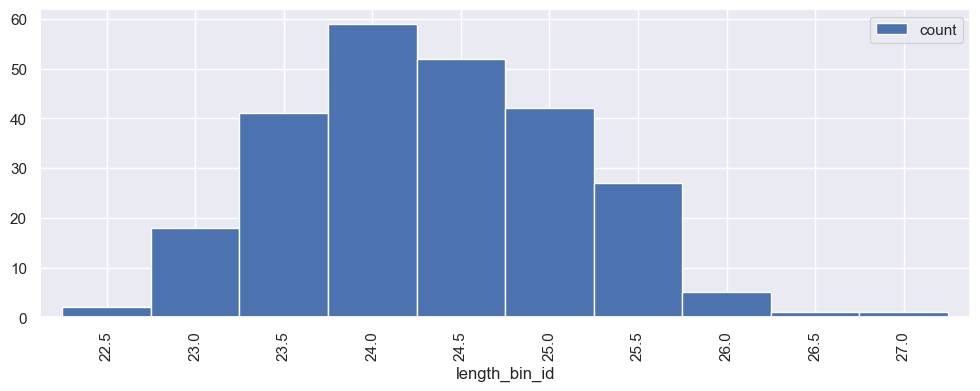

----------------------------------------------
Histogram: 2015060384


In [93]:
for i in range(10):
    sample_id = np.random.choice(sample_ids)
    print('----------------------------------------------\nHistogram:', sample_id)
    gaspereau_lengthfrequency.loc[gaspereau_lengthfrequency.sample_id==sample_id, ['count', 'length_bin_id']].plot(kind='bar', x='length_bin_id', y='count', width=1, figsize=(12,4))
    plt.show()